In [3]:
import os
from IPython.display import display, Image
from math import ceil

def show_png_files(directory):
    png_files = [file for file in os.listdir(directory) if file.endswith('.png')]
    total_images = len(png_files)
    rows = ceil(total_images / 2)
    
    for i in range(rows):
        row_images = png_files[i*3: (i+1)*3]
        for image_file in row_images:
            display(Image(os.path.join(directory, image_file)))
        display("")


## iTunes-Amazon Results

In [4]:
!python experiments.py iTunes-Amazon Genre 0.2 30 6

=============== iTunes-Amazon ===============
Model: DeepMatcher
Computing Single Fairness...
-------------------------------------------------
Model: Ditto
Computing Single Fairness...
-------------------------------------------------
Model: GNEM
Computing Single Fairness...
-------------------------------------------------
Model: HierMatcher
Computing Single Fairness...
-------------------------------------------------
Model: MCAN
Computing Single Fairness...
-------------------------------------------------
Model: svm
Computing Single Fairness...
-------------------------------------------------
Model: rf
Computing Single Fairness...
-------------------------------------------------
Model: nb
Computing Single Fairness...
-------------------------------------------------
Model: lg
Computing Single Fairness...
-------------------------------------------------
Model: ln
Computing Single Fairness...
-------------------------------------------------
Model: dt
Computing Single Fairness...

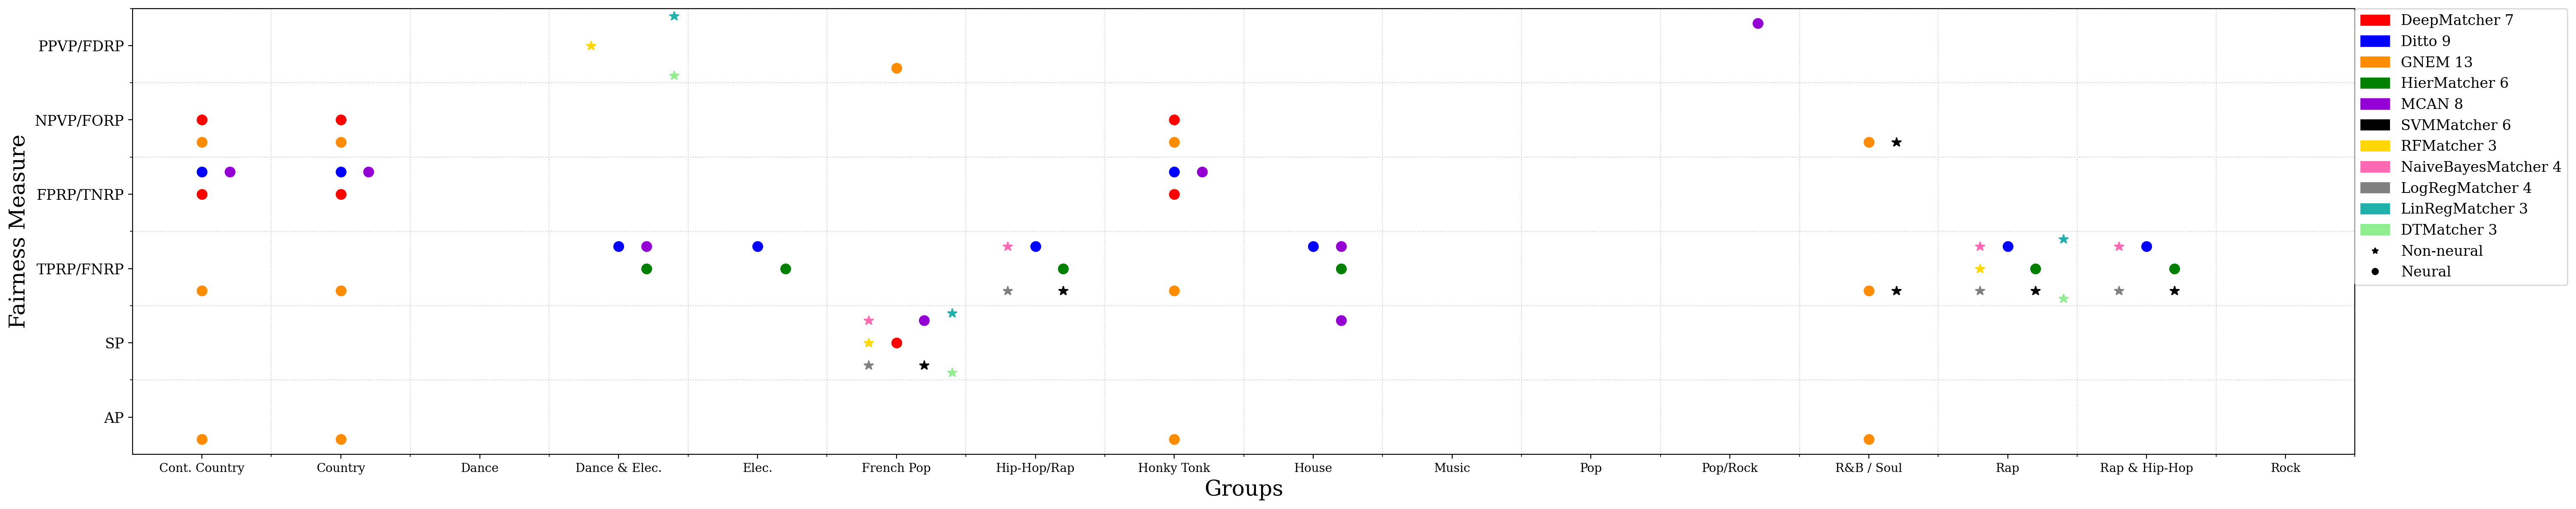

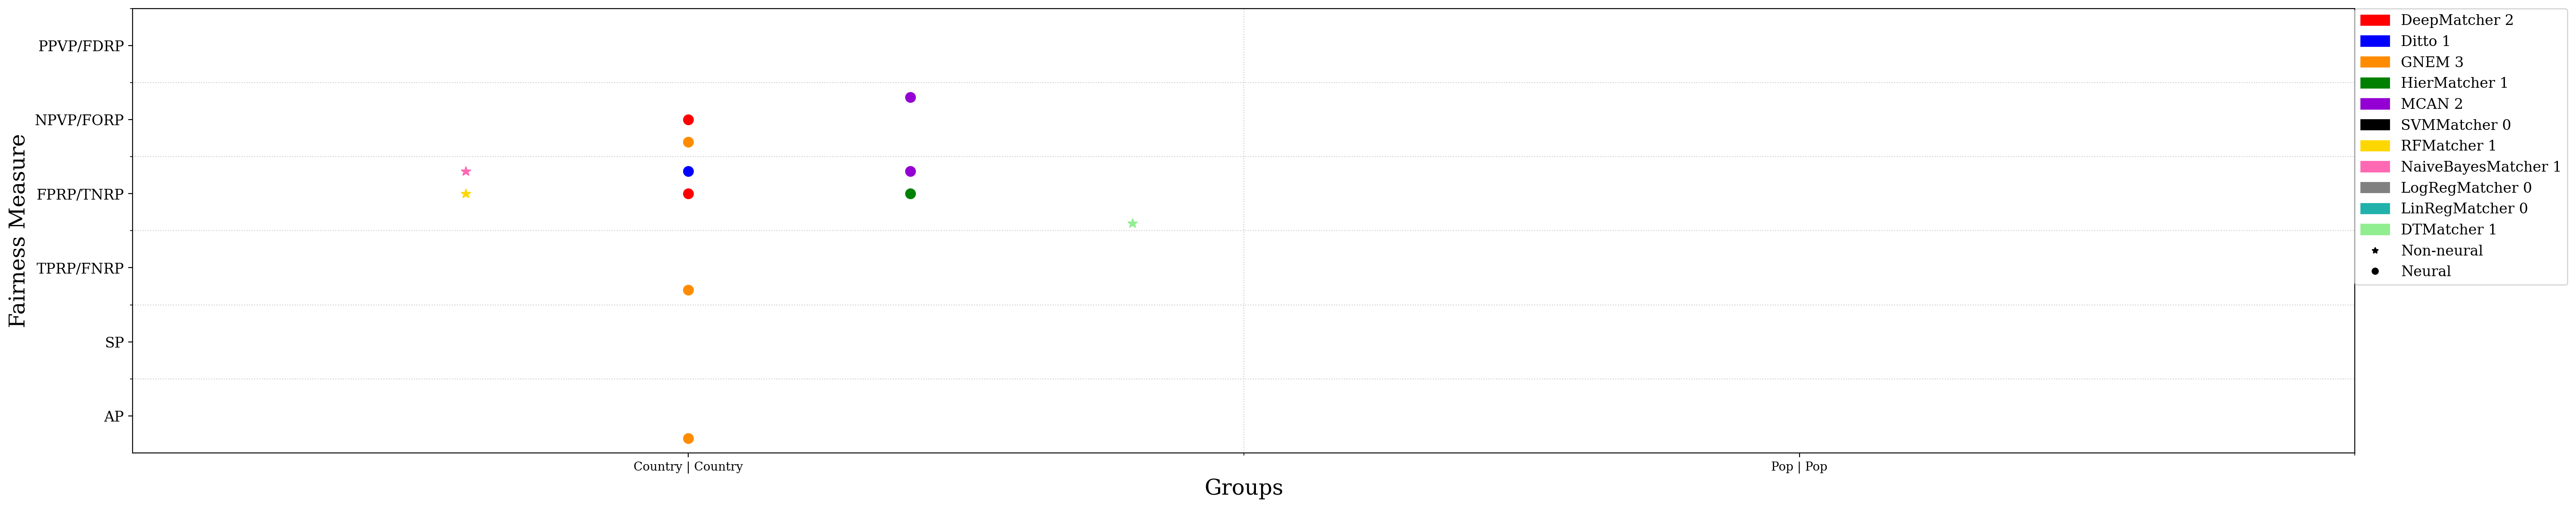

''

In [5]:
directory_path = './experiments/iTunes-Amazon/'
show_png_files(directory_path)

## DBLP-ACM

In [6]:
!python experiments.py DBLP-ACM venue 0.2 12 6

=============== DBLP-ACM ===============
Model: DeepMatcher
Computing Single Fairness...
-------------------------------------------------
Model: Ditto
Computing Single Fairness...
-------------------------------------------------
Model: GNEM
Computing Single Fairness...
-------------------------------------------------
Model: HierMatcher
Computing Single Fairness...
-------------------------------------------------
Model: MCAN
Computing Single Fairness...
-------------------------------------------------
Model: svm
Computing Single Fairness...
-------------------------------------------------
Model: brm
Computing Single Fairness...
-------------------------------------------------
Model: rf
Computing Single Fairness...
-------------------------------------------------
Model: nb
Computing Single Fairness...
-------------------------------------------------
Model: lg
Computing Single Fairness...
-------------------------------------------------
Model: ln
Computing Single Fairness...
---

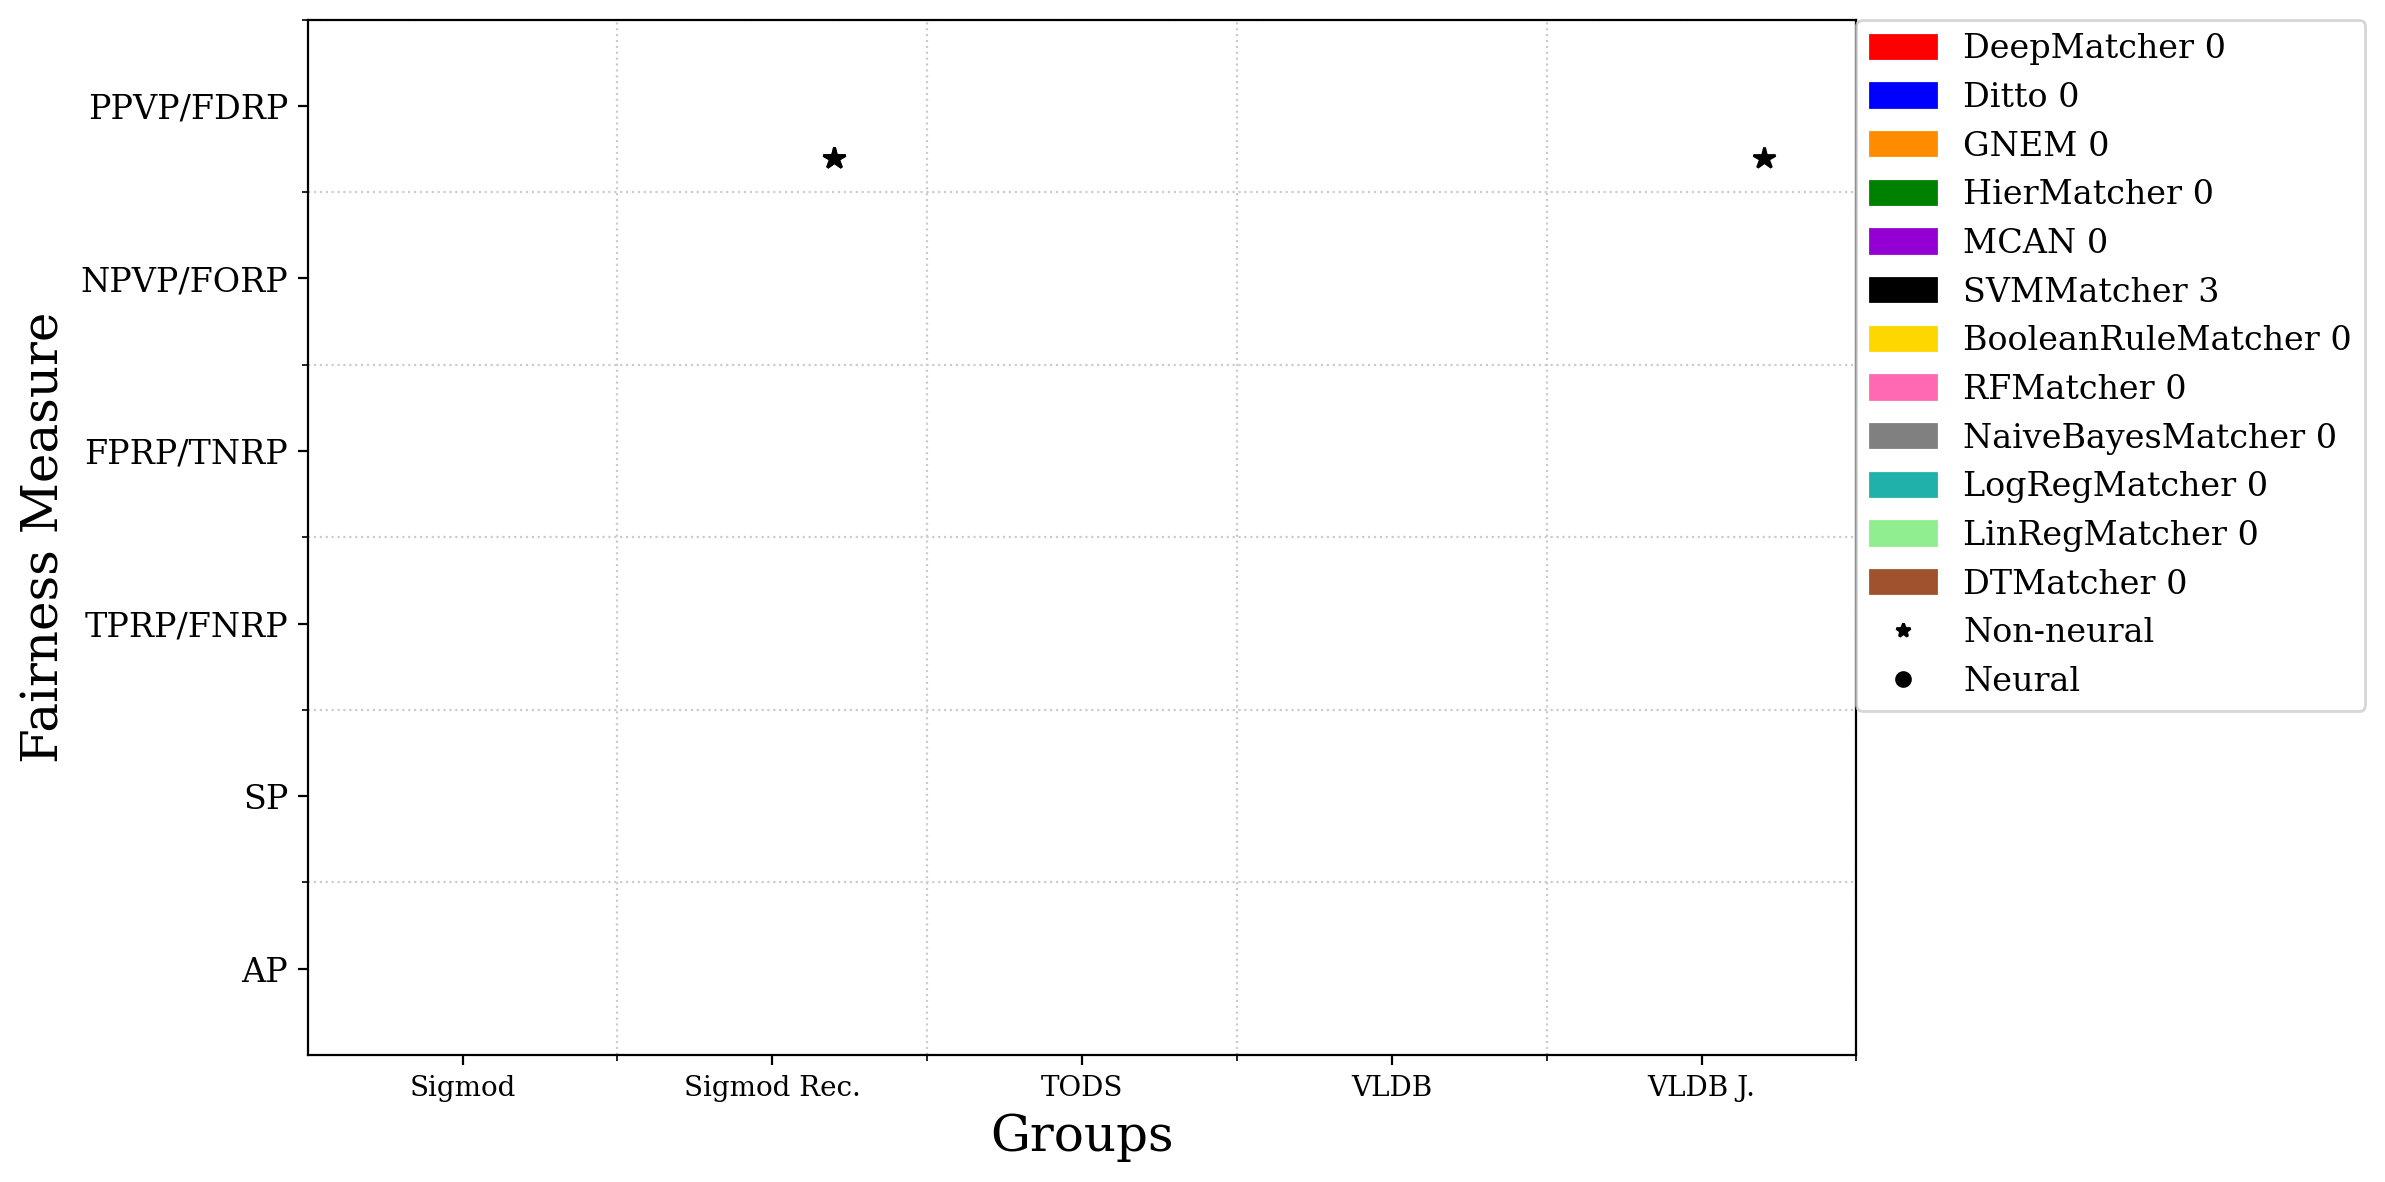

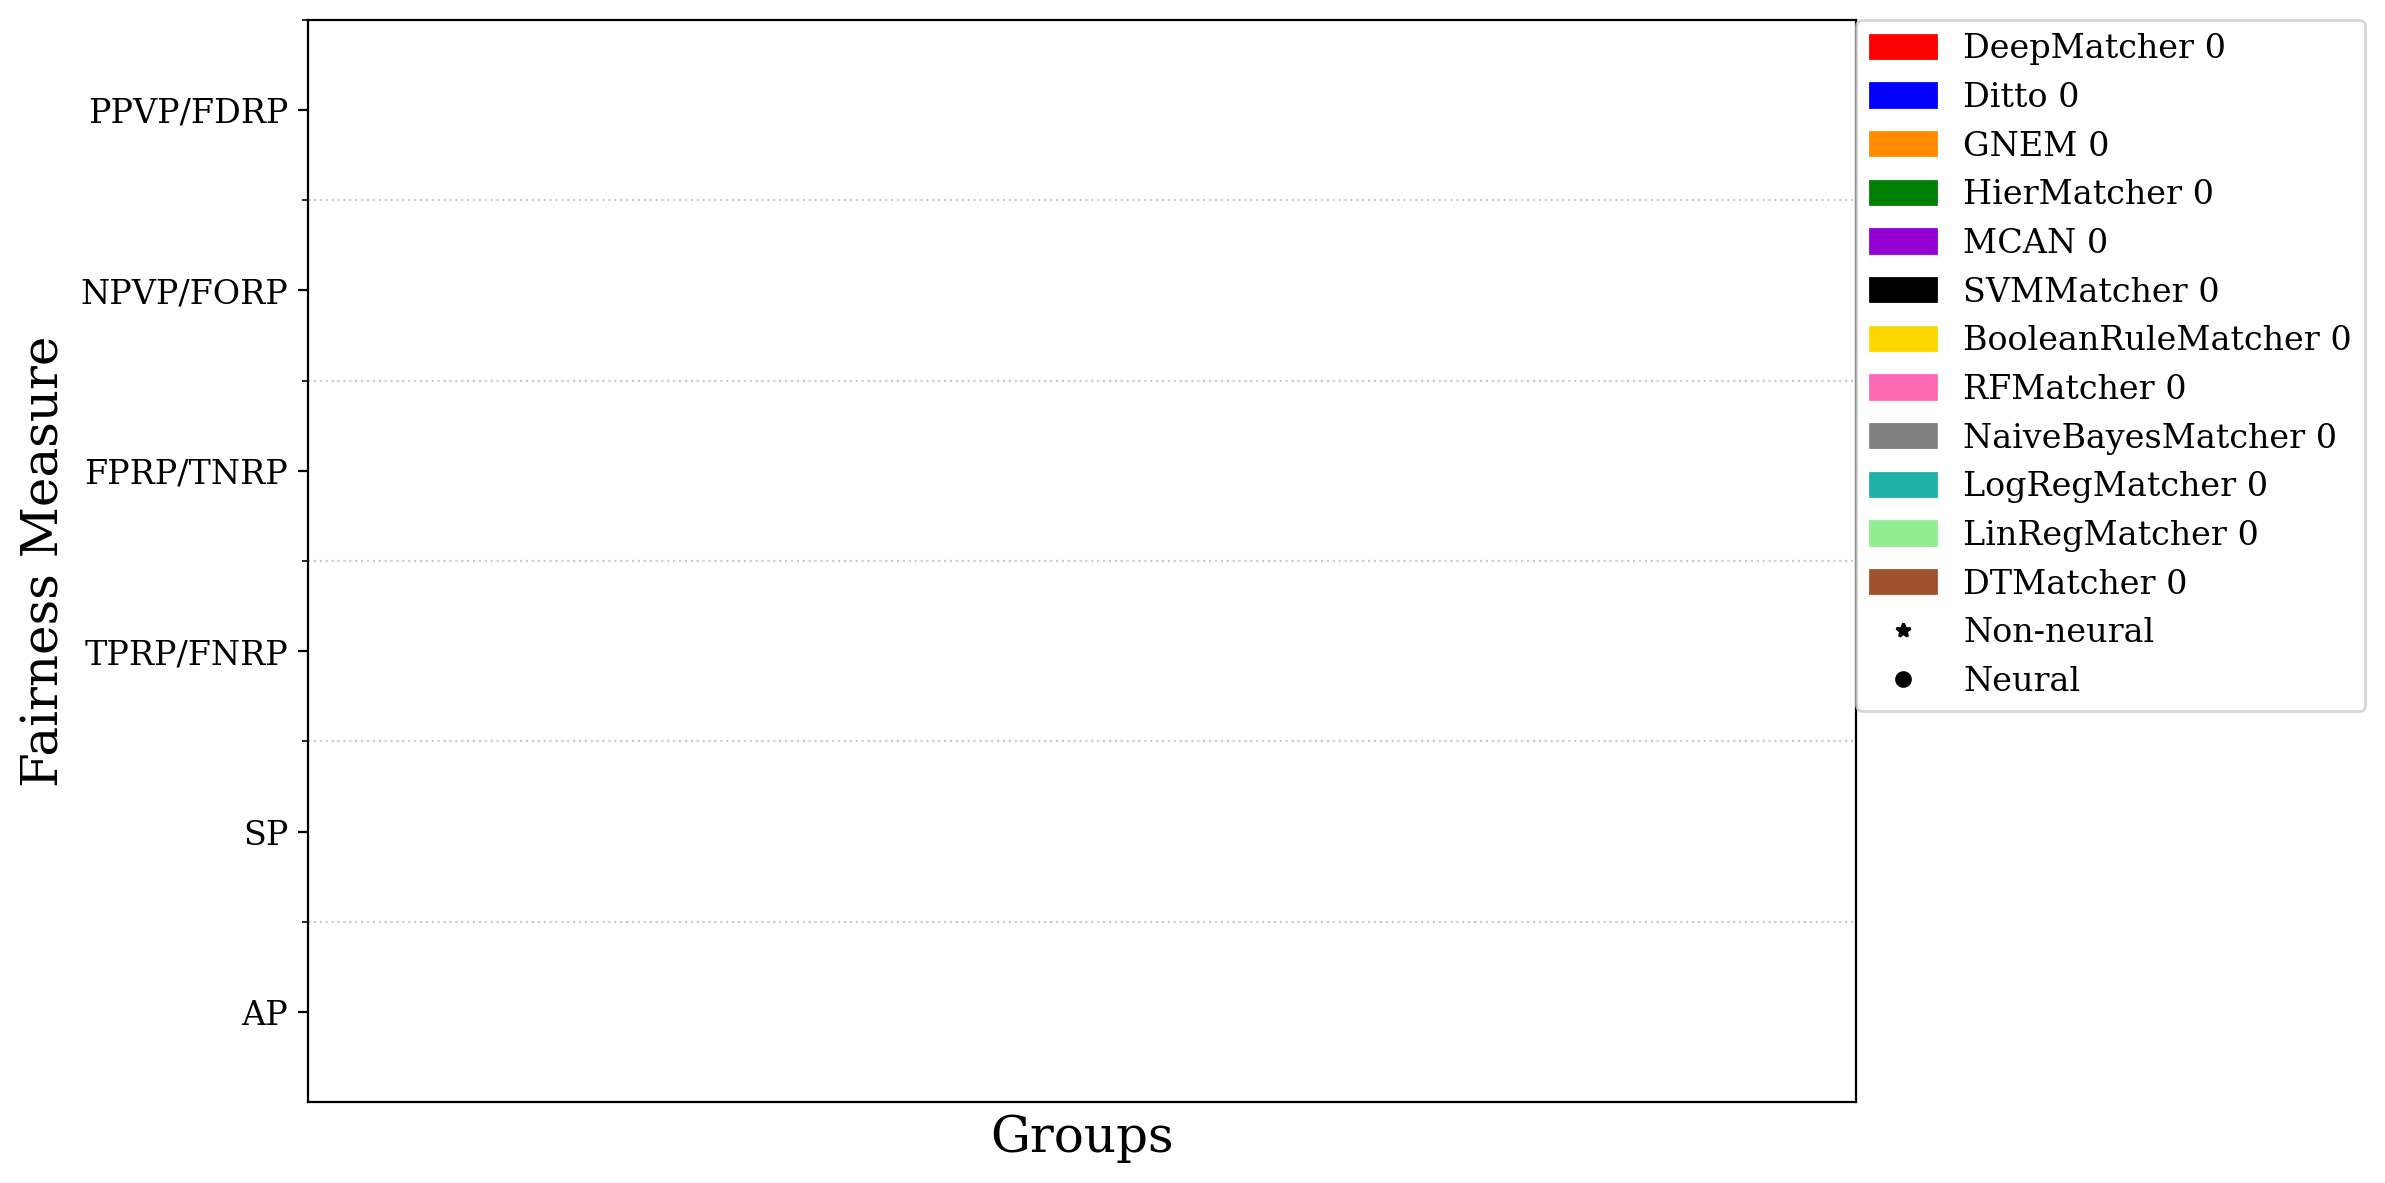

''

In [7]:
directory_path = './experiments/DBLP-ACM/'
show_png_files(directory_path)

## DBLP-Scholar

In [8]:
!python experiments.py DBLP-Scholar ENTRYTYPE 0.2 12 6

=============== DBLP-Scholar ===============
Model: DeepMatcher
Computing Single Fairness...
-------------------------------------------------
Model: Ditto
Computing Single Fairness...
-------------------------------------------------
Model: GNEM
Computing Single Fairness...
-------------------------------------------------
Model: HierMatcher
Computing Single Fairness...
-------------------------------------------------
Model: MCAN
Computing Single Fairness...
-------------------------------------------------
Model: svm
Computing Single Fairness...
-------------------------------------------------
Model: brm
Computing Single Fairness...
-------------------------------------------------
Model: rf
Computing Single Fairness...
-------------------------------------------------
Model: nb
Computing Single Fairness...
-------------------------------------------------
Model: lg
Computing Single Fairness...
-------------------------------------------------
Model: ln
Computing Single Fairness...

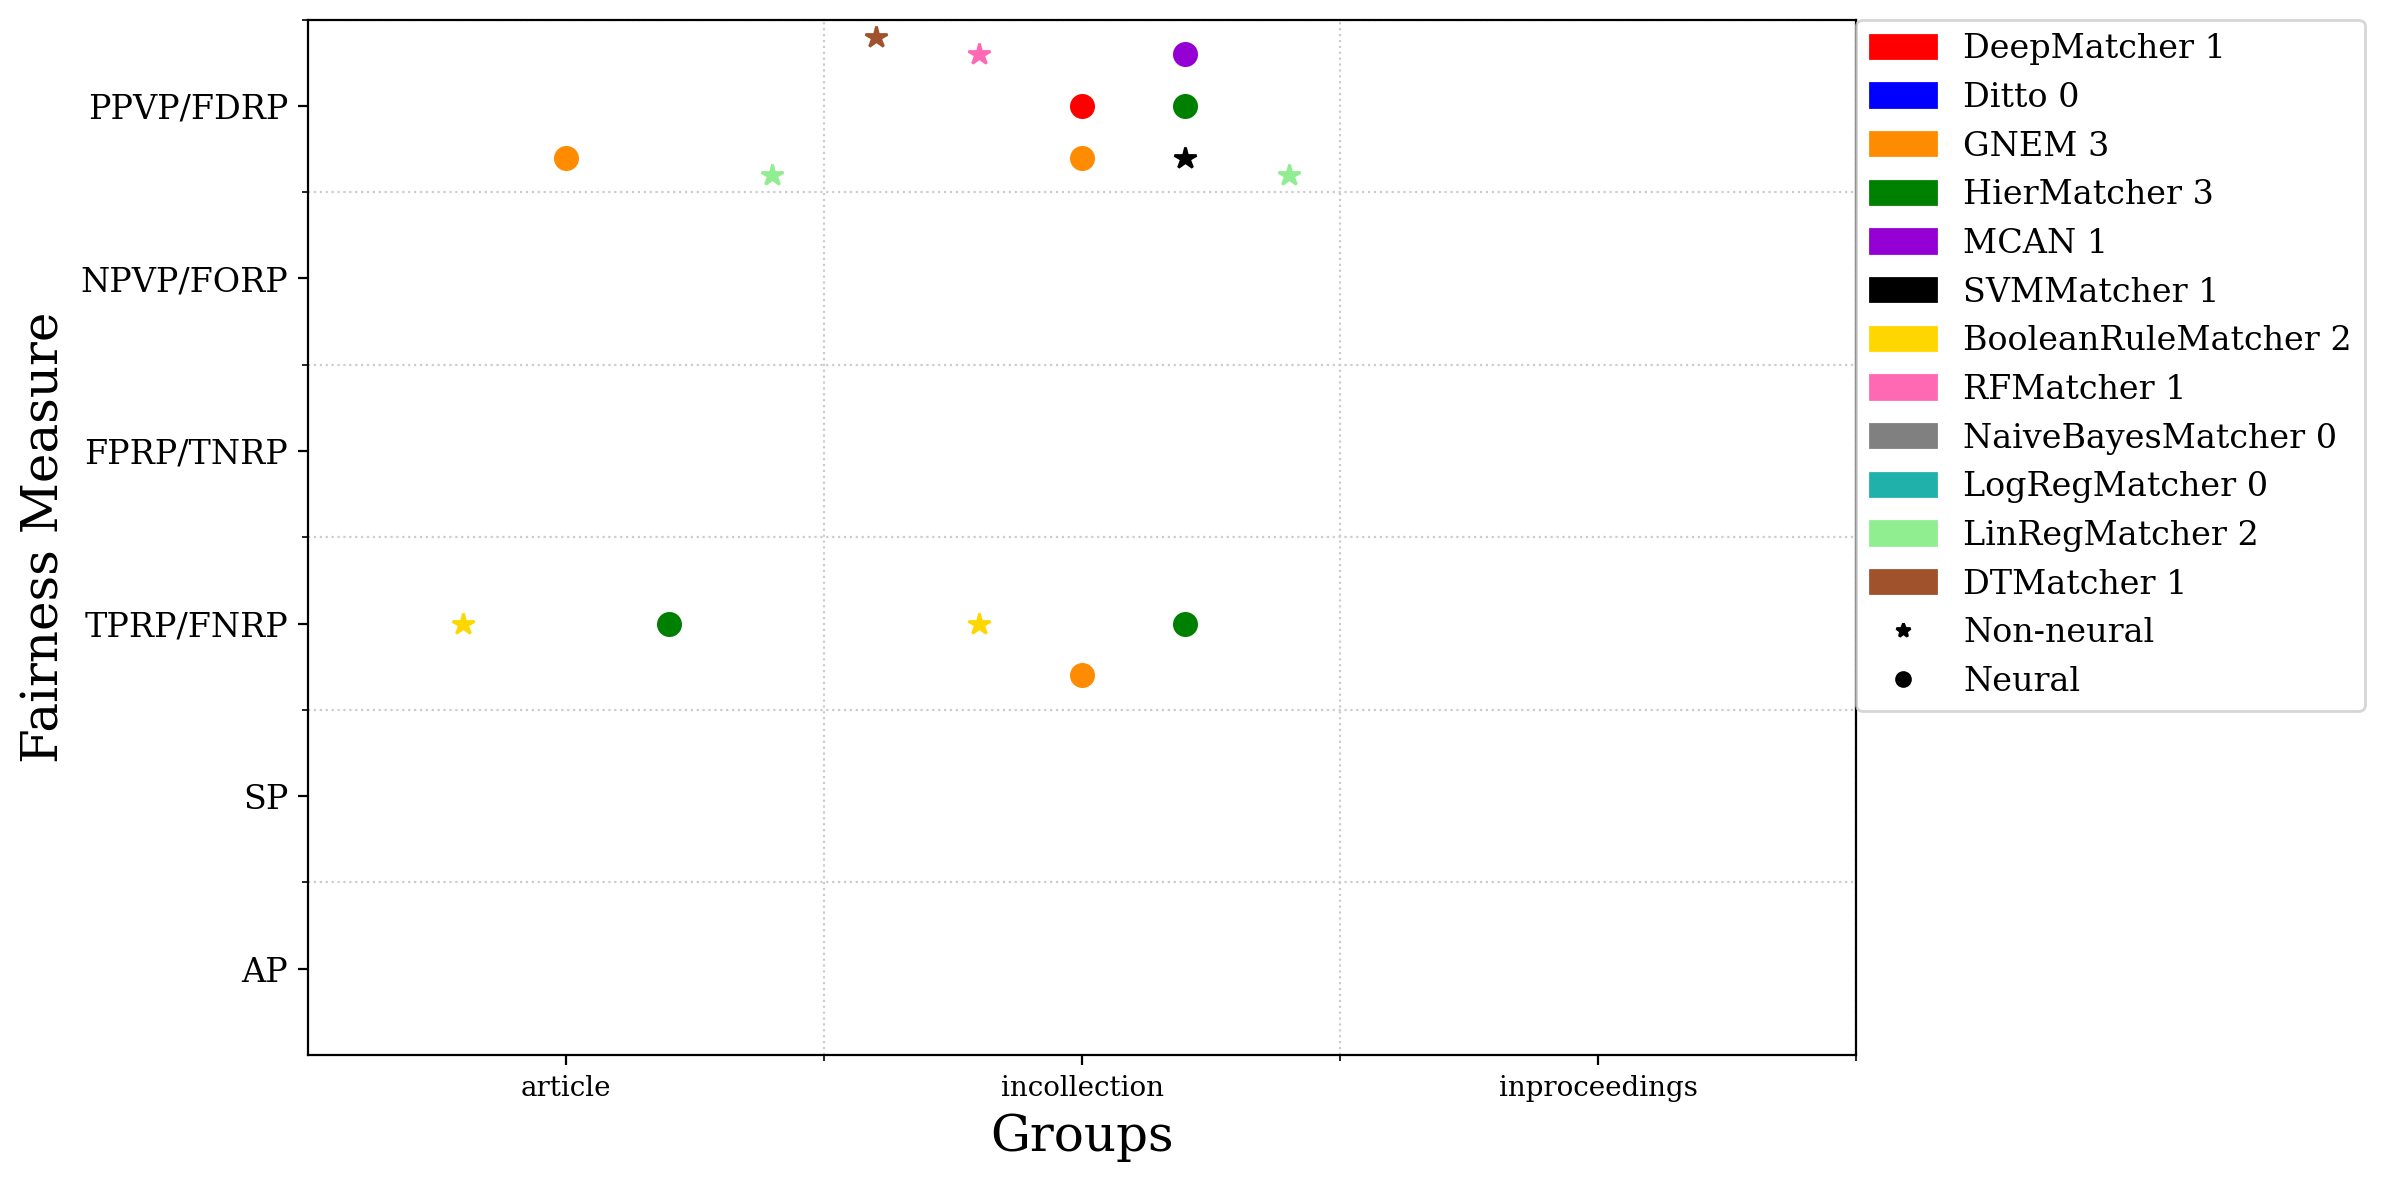

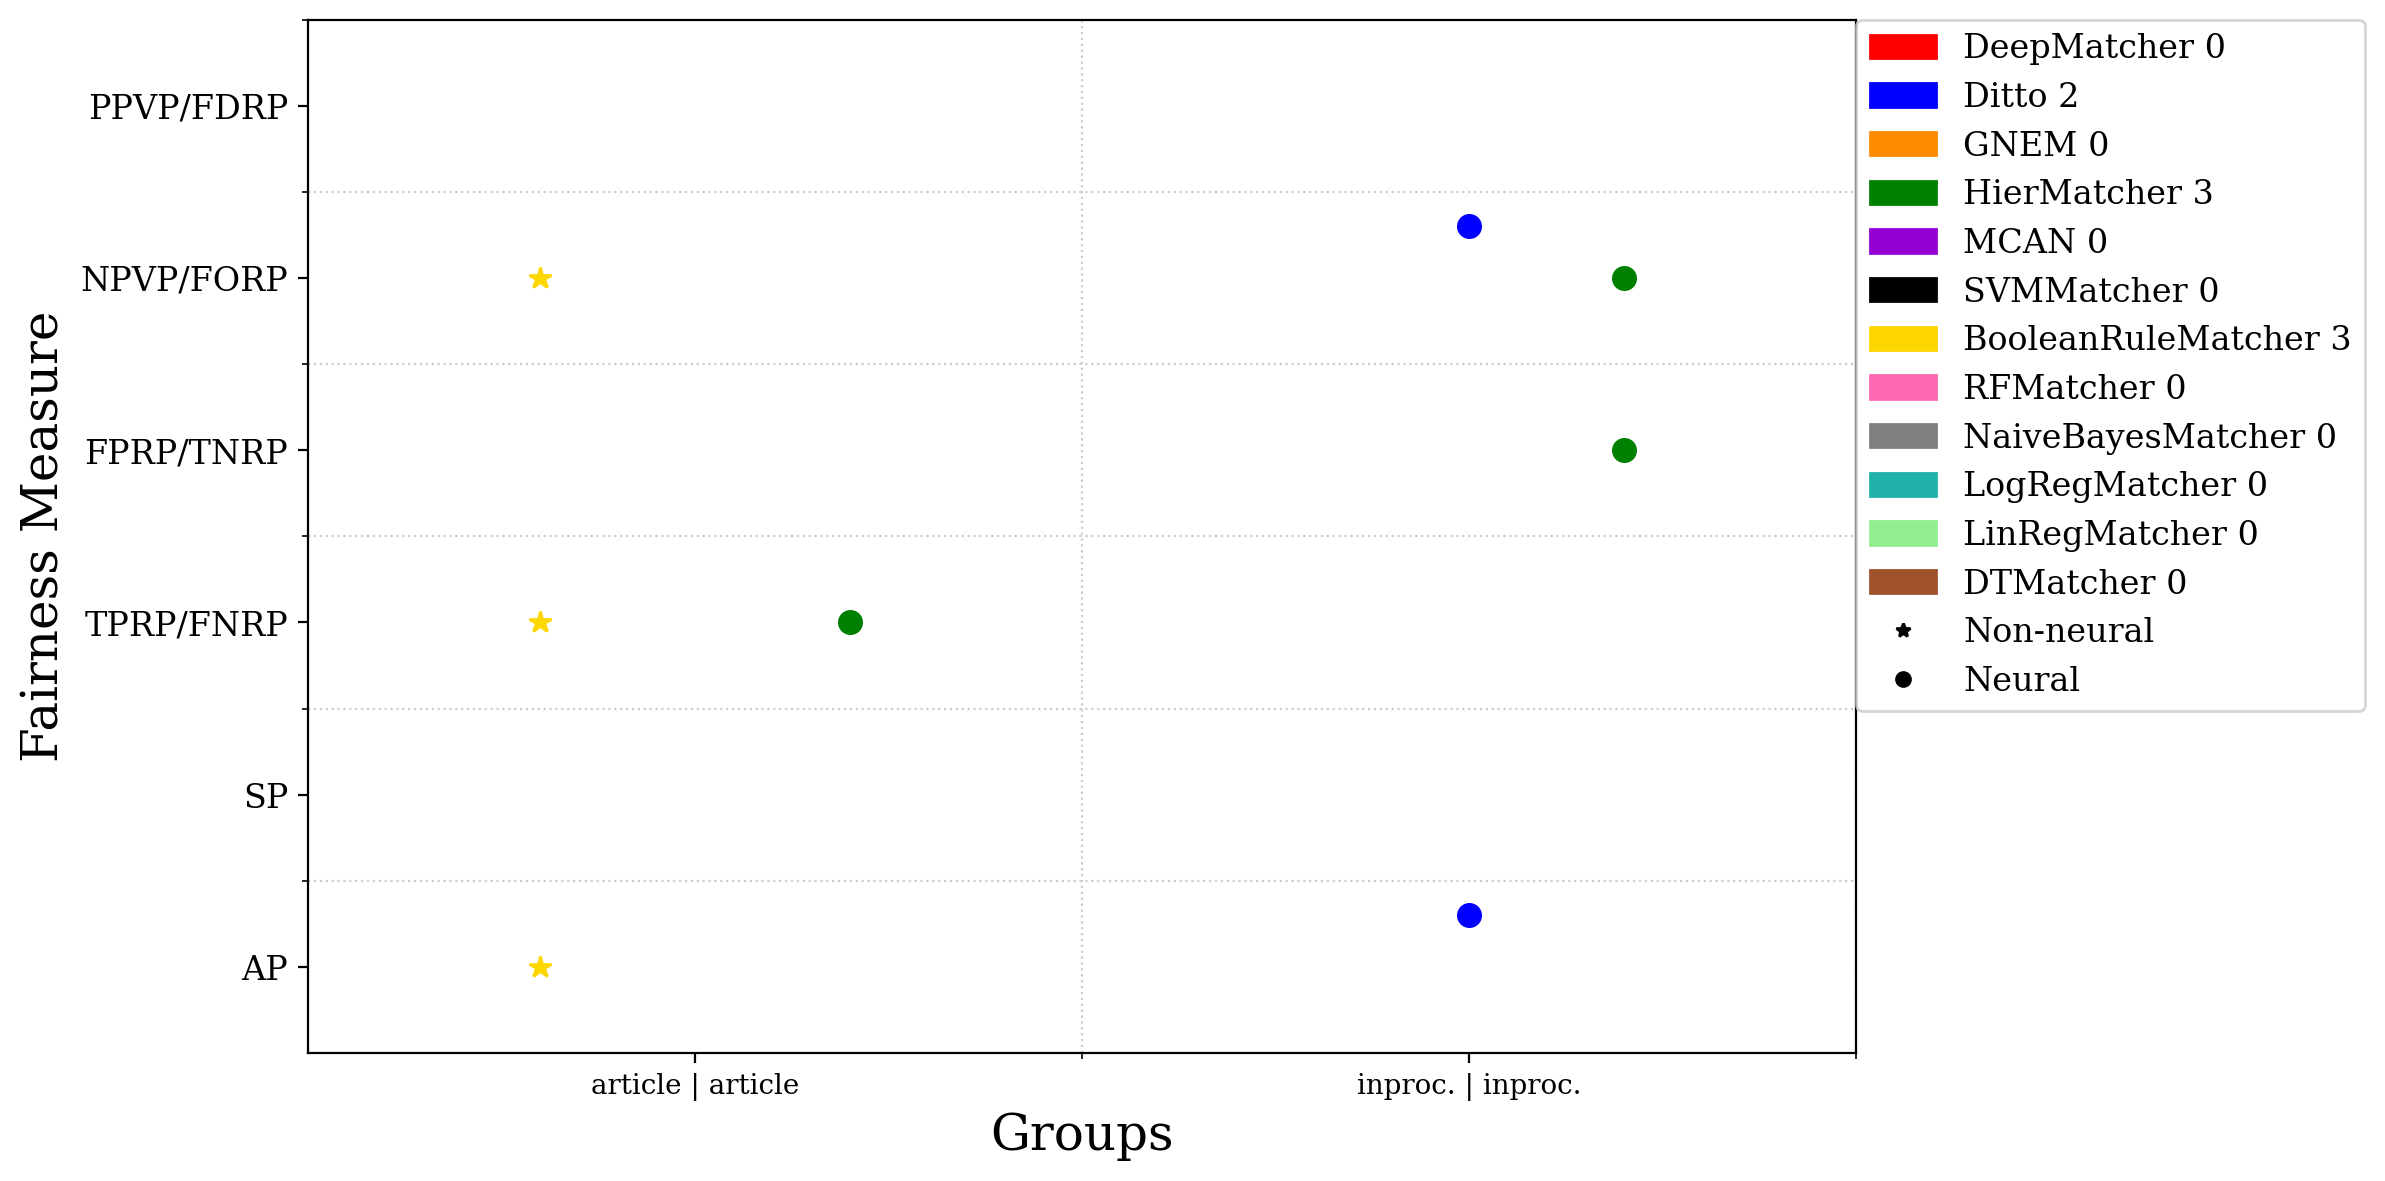

''

In [9]:
directory_path = './experiments/DBLP-Scholar/'
show_png_files(directory_path)

## Cricket

In [10]:
!python experiments.py Cricket batting_style 0.2 12 6

=============== Cricket ===============
Model: DeepMatcher
Computing Single Fairness...
-------------------------------------------------
Model: Ditto
Computing Single Fairness...
-------------------------------------------------
Model: GNEM
Computing Single Fairness...
-------------------------------------------------
Model: HierMatcher
Computing Single Fairness...
-------------------------------------------------
Model: MCAN
Computing Single Fairness...
-------------------------------------------------
Model: svm
Computing Single Fairness...
-------------------------------------------------
Model: brm
Computing Single Fairness...
-------------------------------------------------
Model: rf
Computing Single Fairness...
-------------------------------------------------
Model: nb
Computing Single Fairness...
-------------------------------------------------
Model: lg
Computing Single Fairness...
-------------------------------------------------
Model: ln
Computing Single Fairness...
----

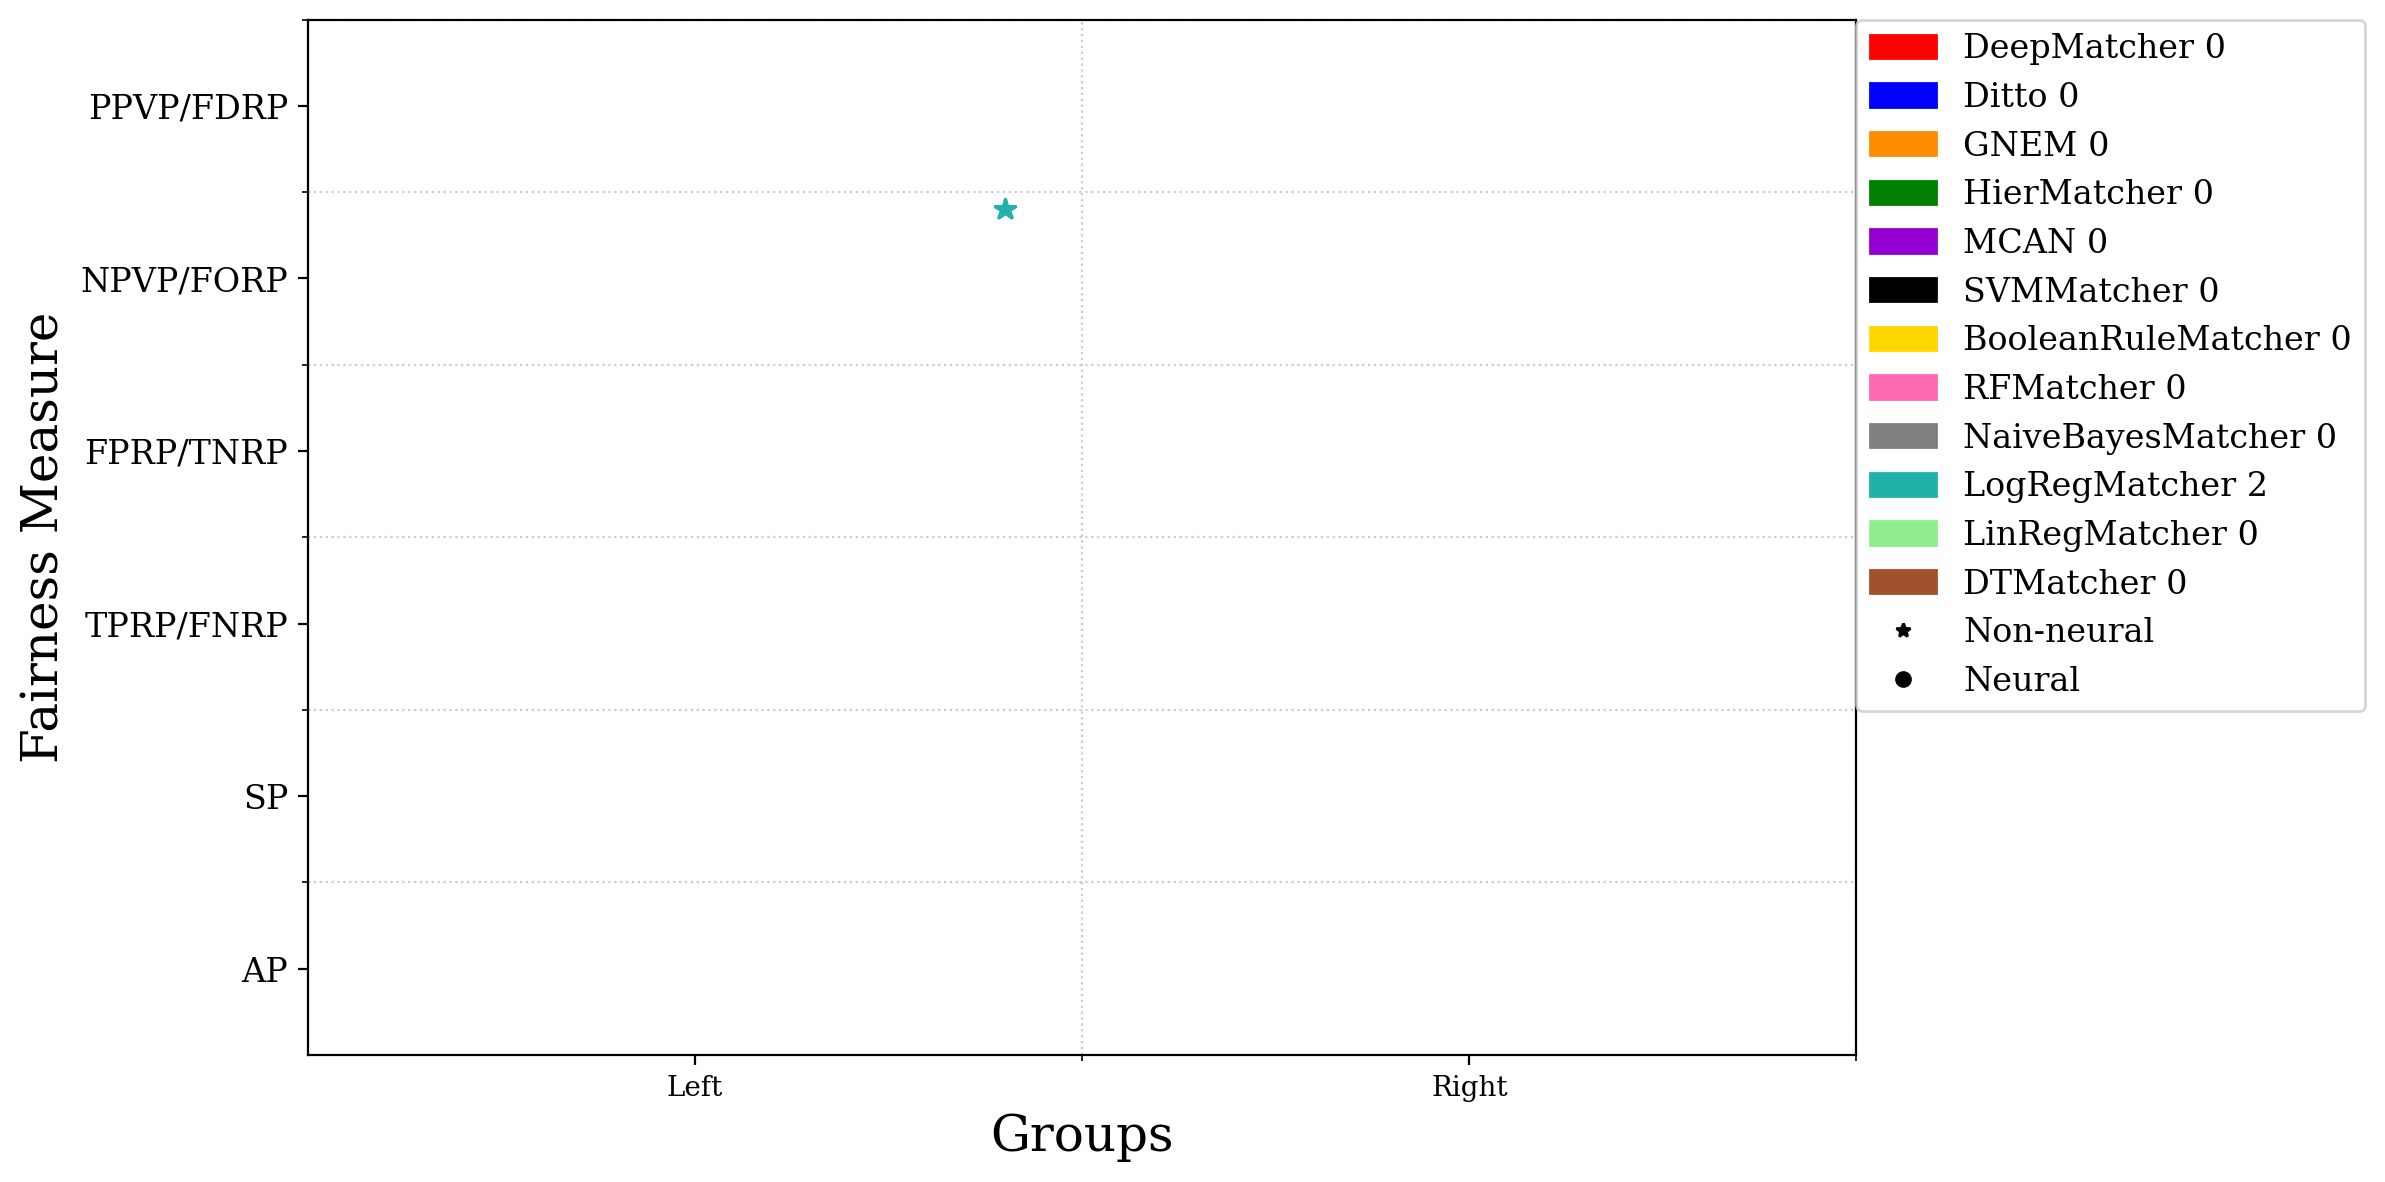

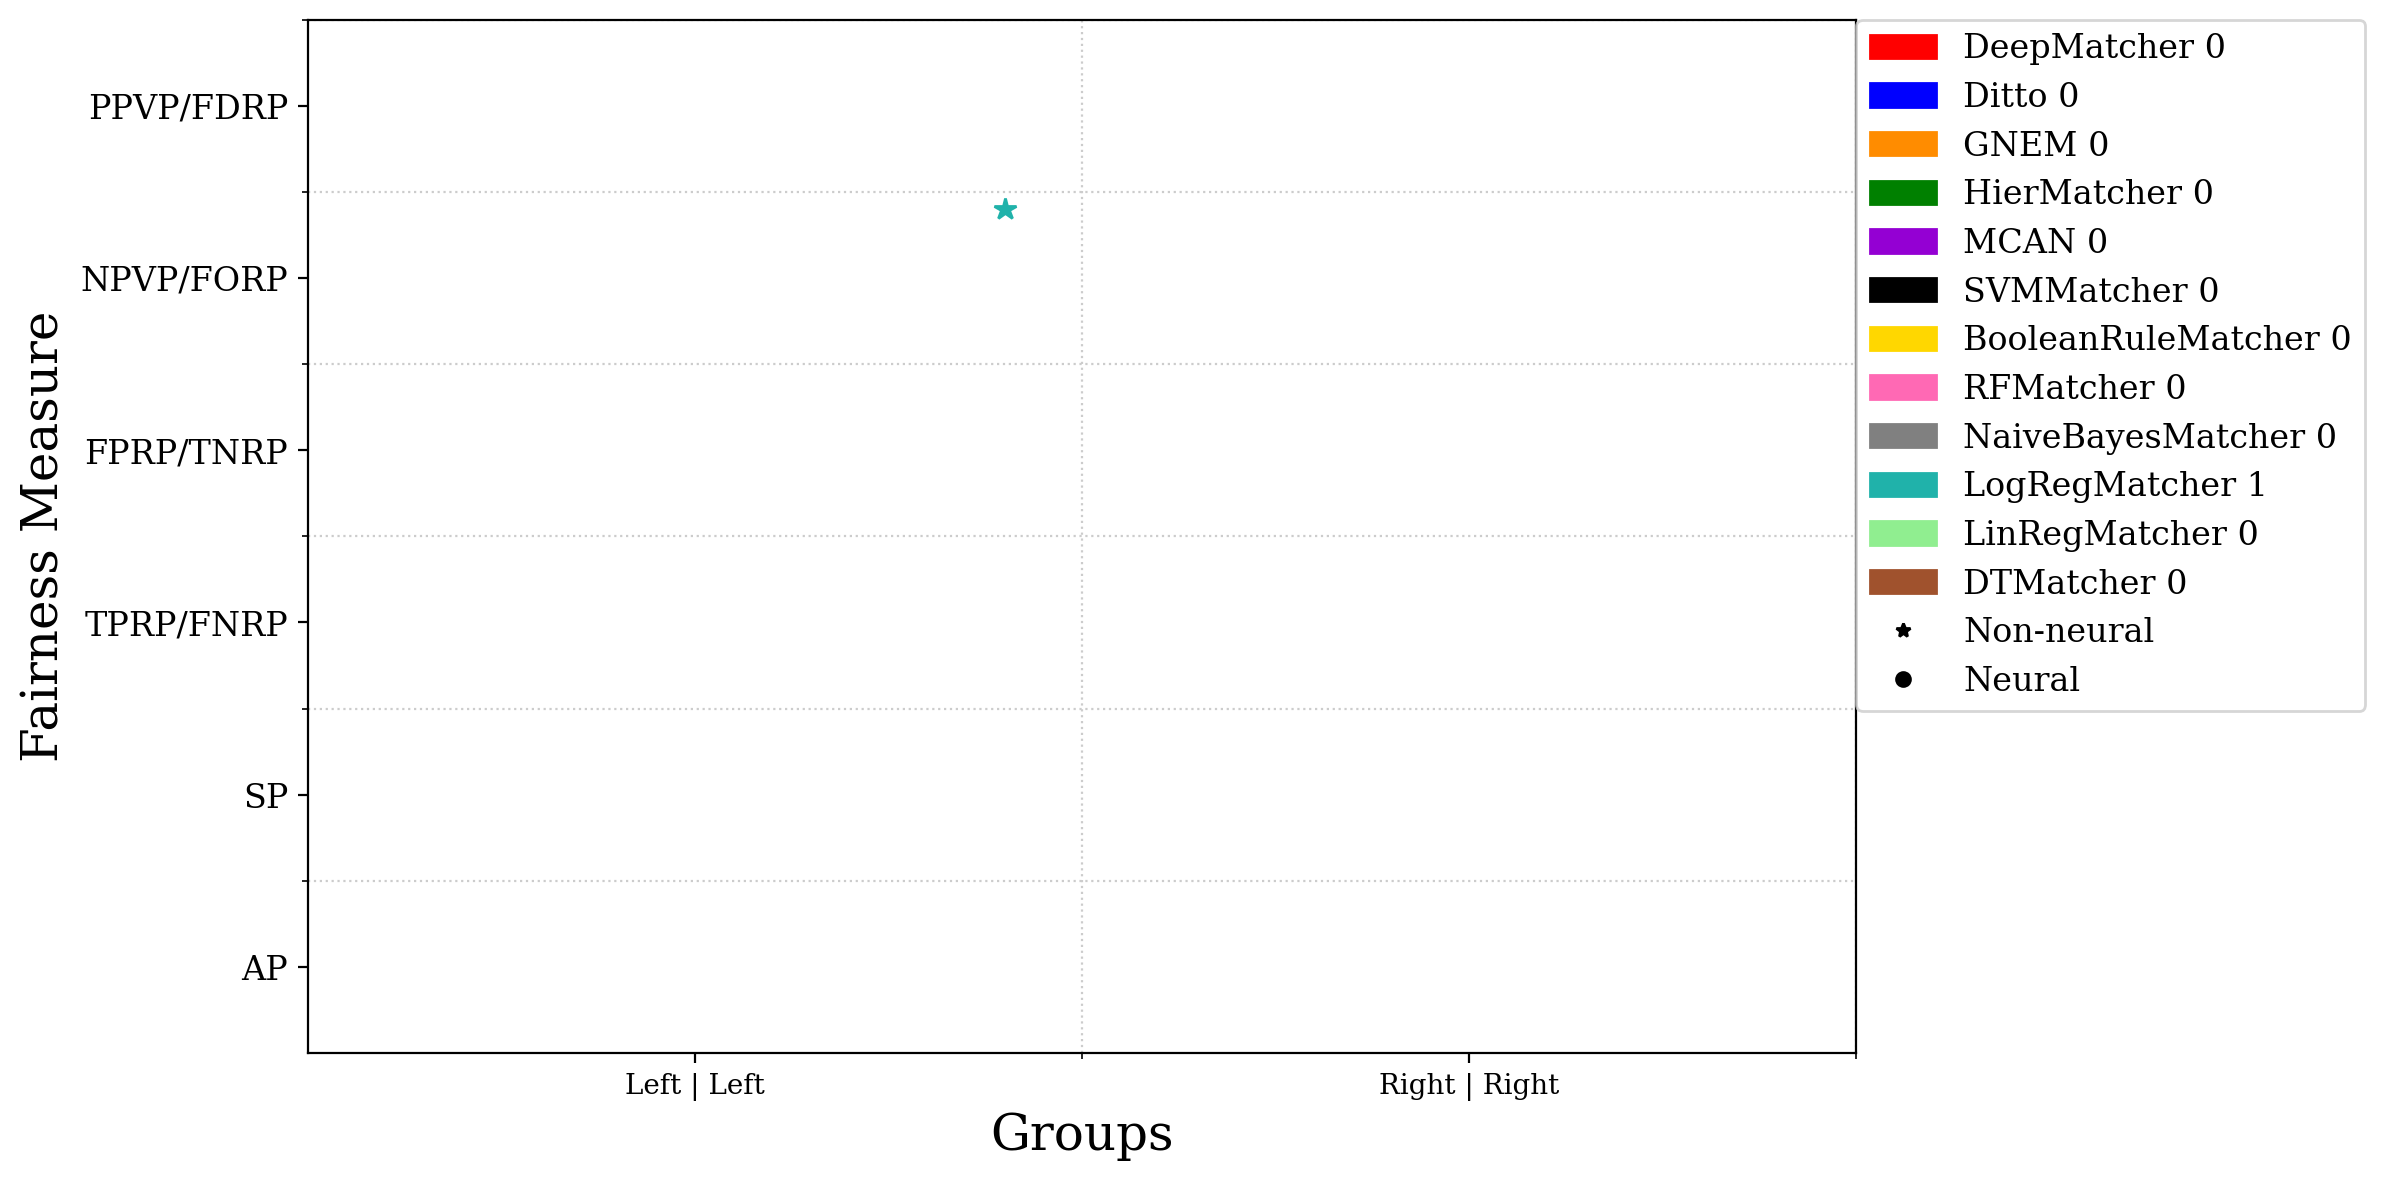

''

In [11]:
directory_path = './experiments/Cricket/'
show_png_files(directory_path)

## Cameras

In [12]:
!python experiments.py Cameras company 0.2 30 6

=============== Cameras ===============
Model: DeepMatcher
Computing Single Fairness...
-------------------------------------------------
Model: Ditto
Computing Single Fairness...
-------------------------------------------------
Model: GNEM
Computing Single Fairness...
-------------------------------------------------
Model: HierMatcher
Computing Single Fairness...
-------------------------------------------------
Model: MCAN
Computing Single Fairness...
-------------------------------------------------
Model: svm
Computing Single Fairness...
-------------------------------------------------
Model: brm
Computing Single Fairness...
-------------------------------------------------
Model: rf
Computing Single Fairness...
-------------------------------------------------
Model: nb
Computing Single Fairness...
-------------------------------------------------
Model: lg
Computing Single Fairness...
-------------------------------------------------
Model: ln
Computing Single Fairness...
----

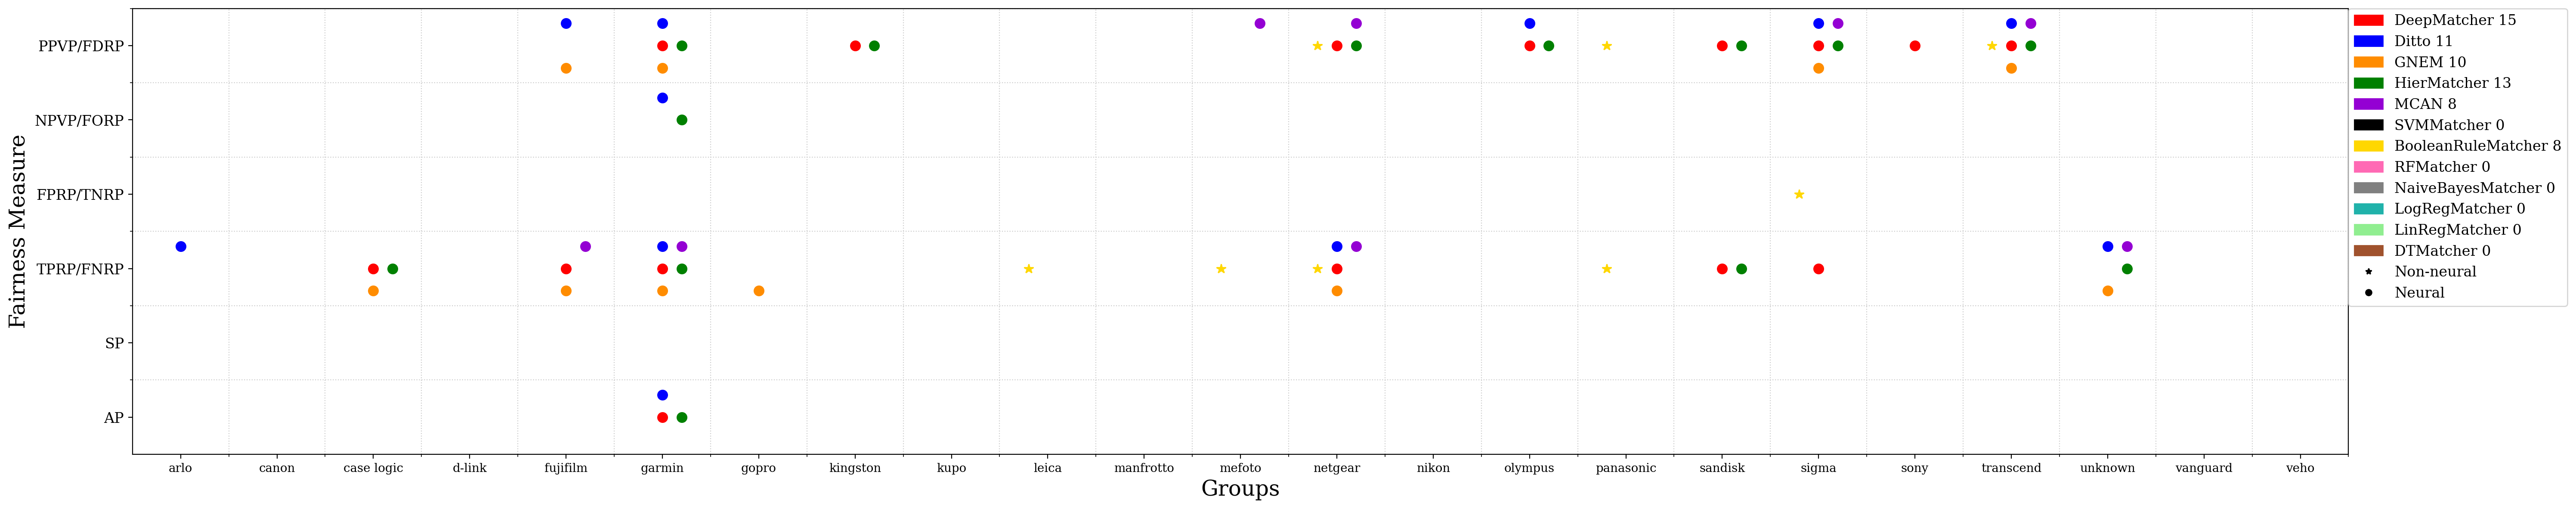

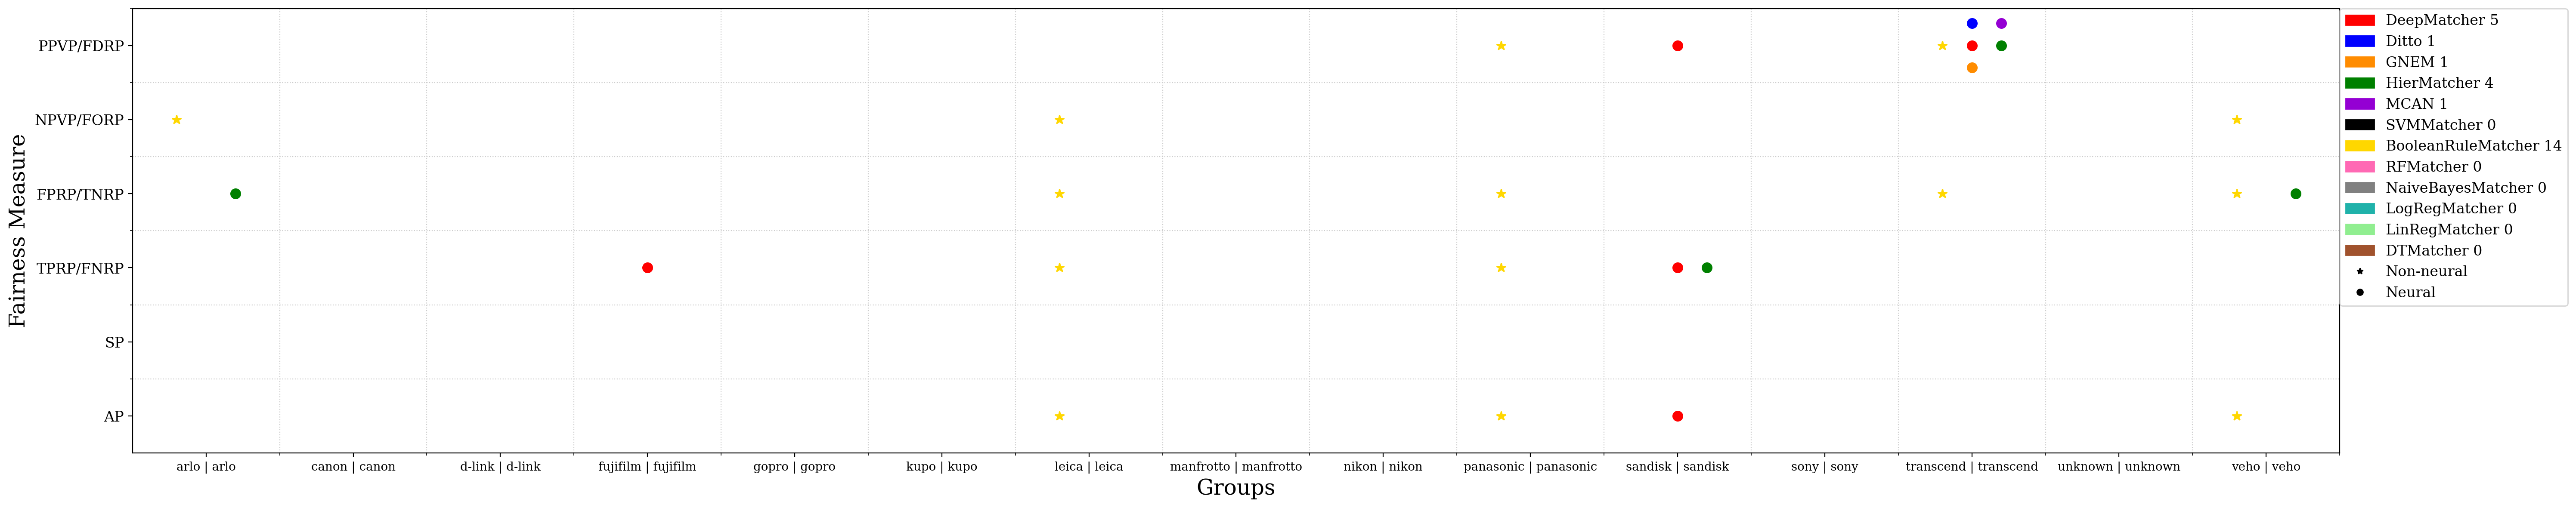

''

In [13]:
directory_path = './experiments/Cameras/'
show_png_files(directory_path)

## NoFlyCompas Results

In [14]:
!python experiments.py Compas Ethnic_Code_Text 0.05 12 6

=============== Compas ===============
Model: DeepMatcher
Computing Single Fairness...
-------------------------------------------------
Model: Ditto
Computing Single Fairness...
-------------------------------------------------
Model: GNEM
Computing Single Fairness...
-------------------------------------------------
Model: HierMatcher
Computing Single Fairness...
-------------------------------------------------
Model: MCAN
Computing Single Fairness...
-------------------------------------------------
Model: svm
Computing Single Fairness...
-------------------------------------------------
Model: brm
Computing Single Fairness...
-------------------------------------------------
Model: rf
Computing Single Fairness...
-------------------------------------------------
Model: nb
Computing Single Fairness...
-------------------------------------------------
Model: lg
Computing Single Fairness...
-------------------------------------------------
Model: ln
Computing Single Fairness...
-----

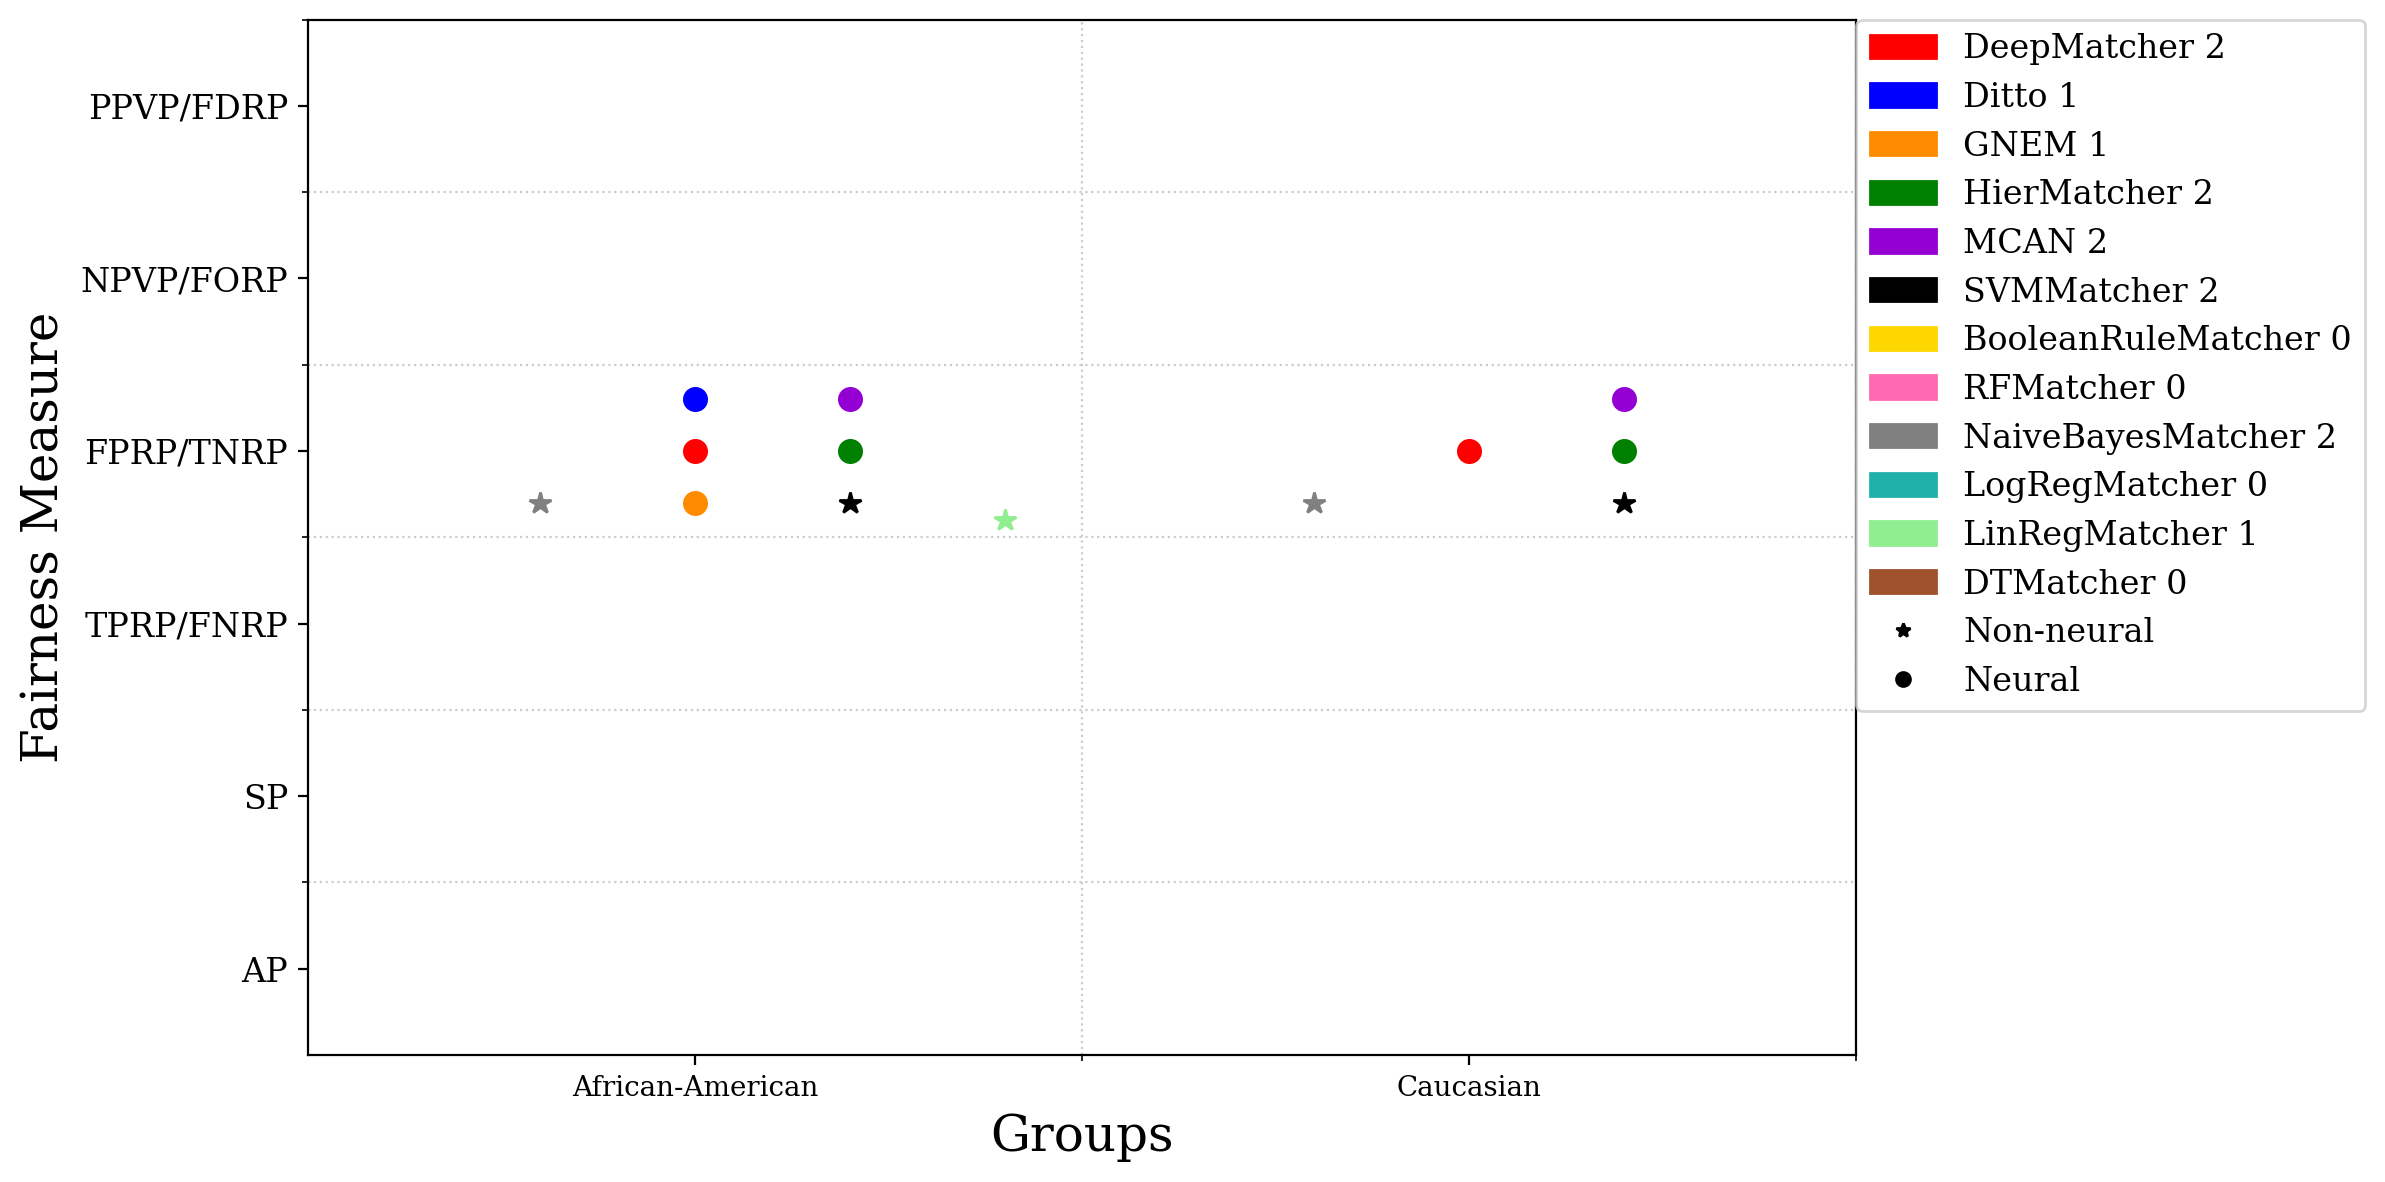

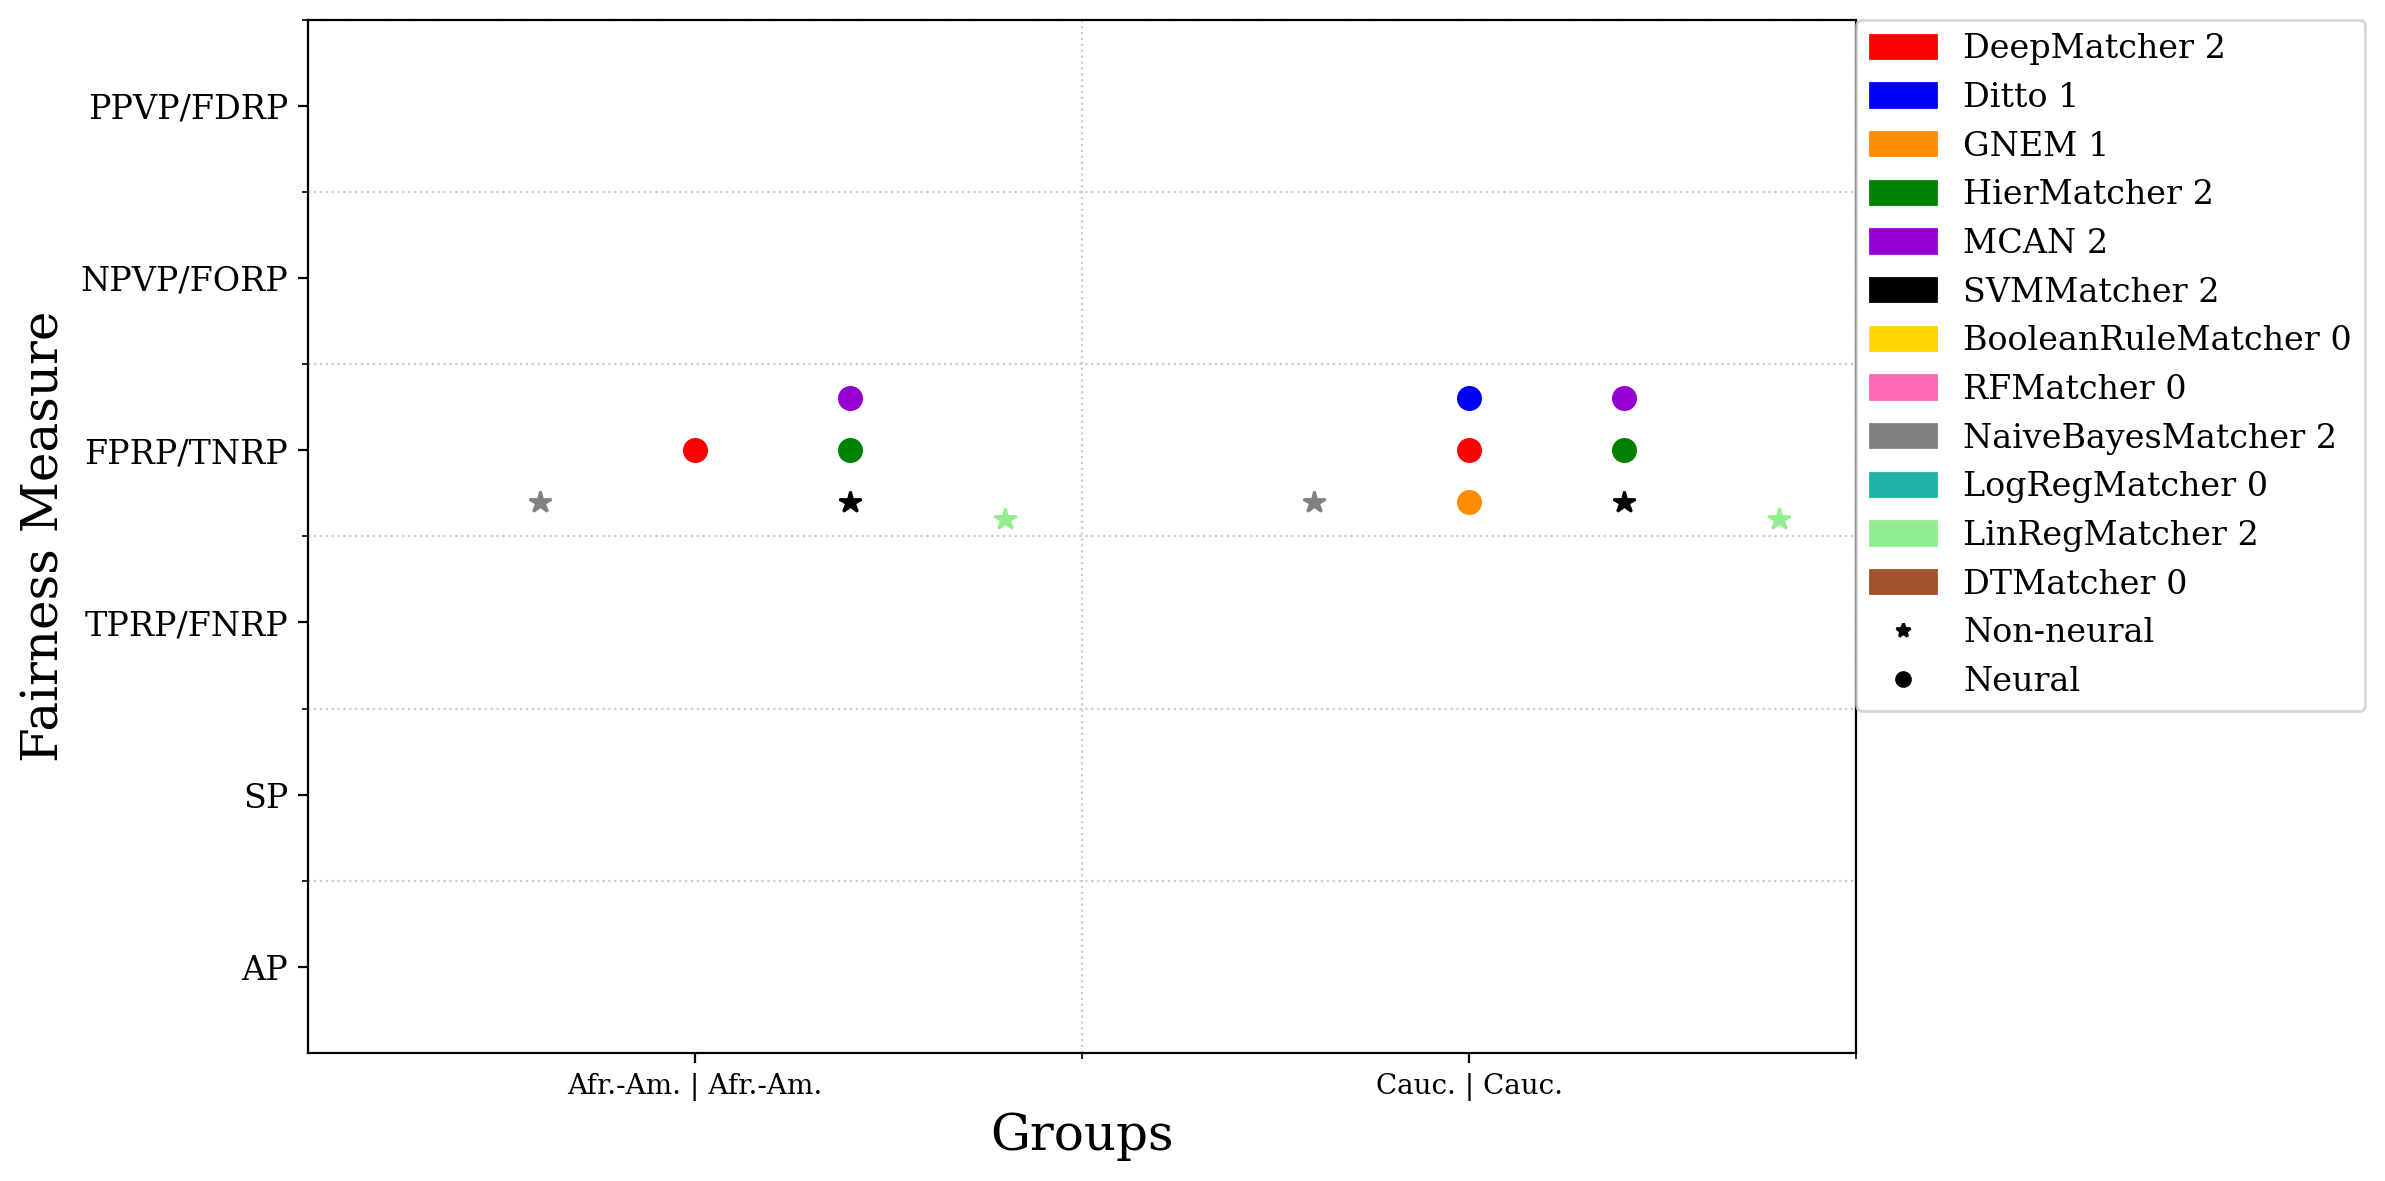

''

In [15]:
directory_path = './experiments/Compas/'
show_png_files(directory_path)

## FacultyMatch Results

In [16]:
!python experiments.py CSRankings countryabbrv 0.05 12 6

=============== CSRankings ===============
Model: DeepMatcher
Computing Single Fairness...
-------------------------------------------------
Model: Ditto
Computing Single Fairness...
-------------------------------------------------
Model: GNEM
Computing Single Fairness...
-------------------------------------------------
Model: HierMatcher
Computing Single Fairness...
-------------------------------------------------
Model: MCAN
Computing Single Fairness...
-------------------------------------------------
Model: svm
Computing Single Fairness...
-------------------------------------------------
Model: brm
Computing Single Fairness...
-------------------------------------------------
Model: rf
Computing Single Fairness...
-------------------------------------------------
Model: nb
Computing Single Fairness...
-------------------------------------------------
Model: lg
Computing Single Fairness...
-------------------------------------------------
Model: ln
Computing Single Fairness...
-

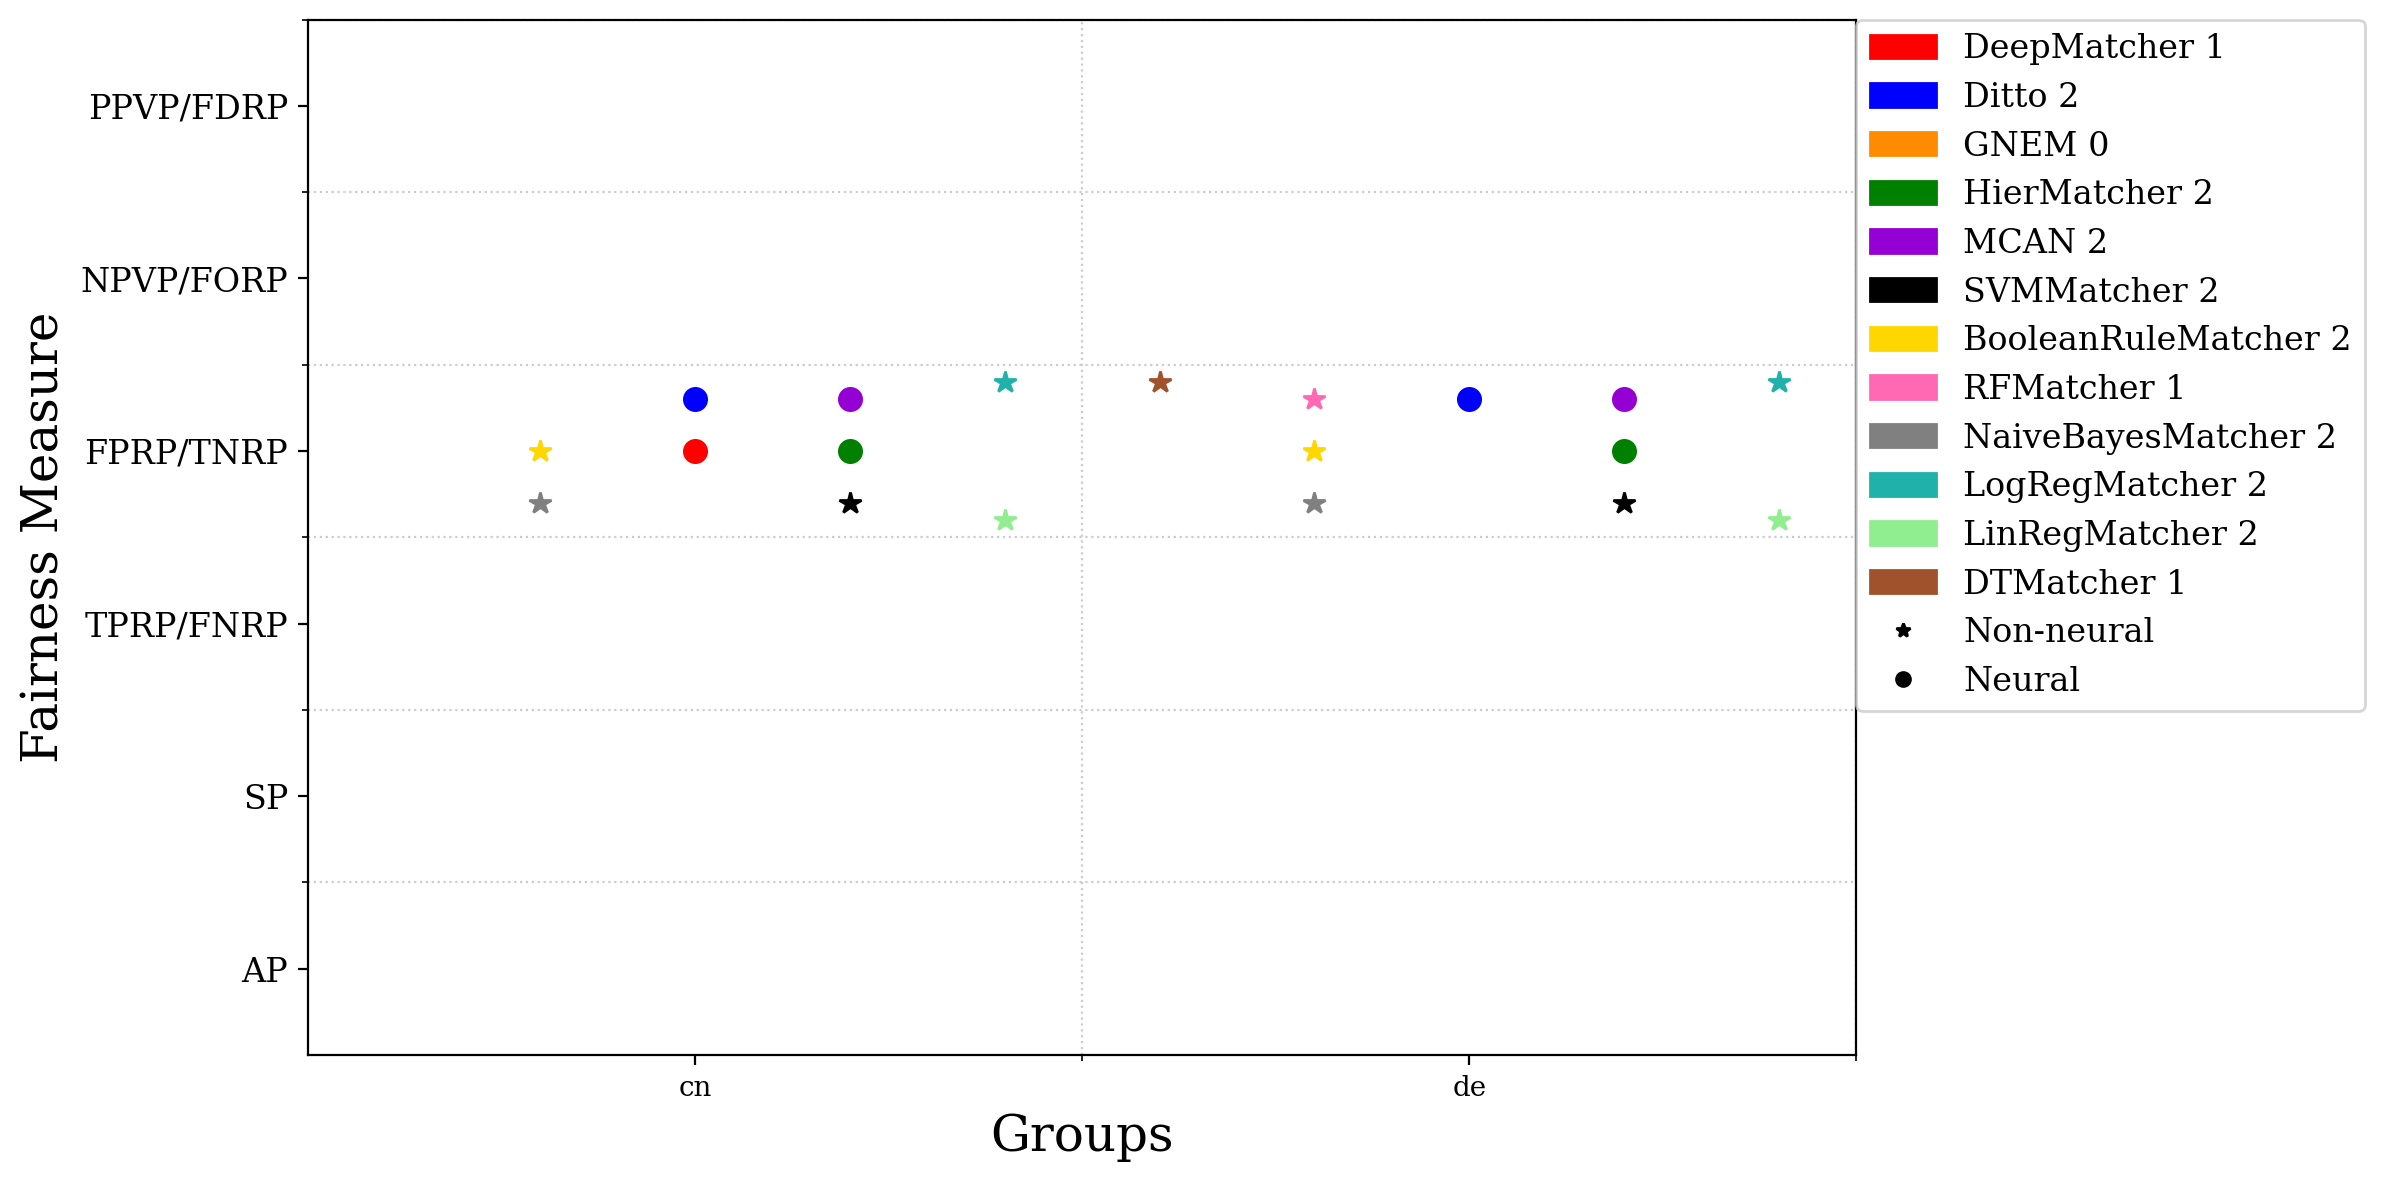

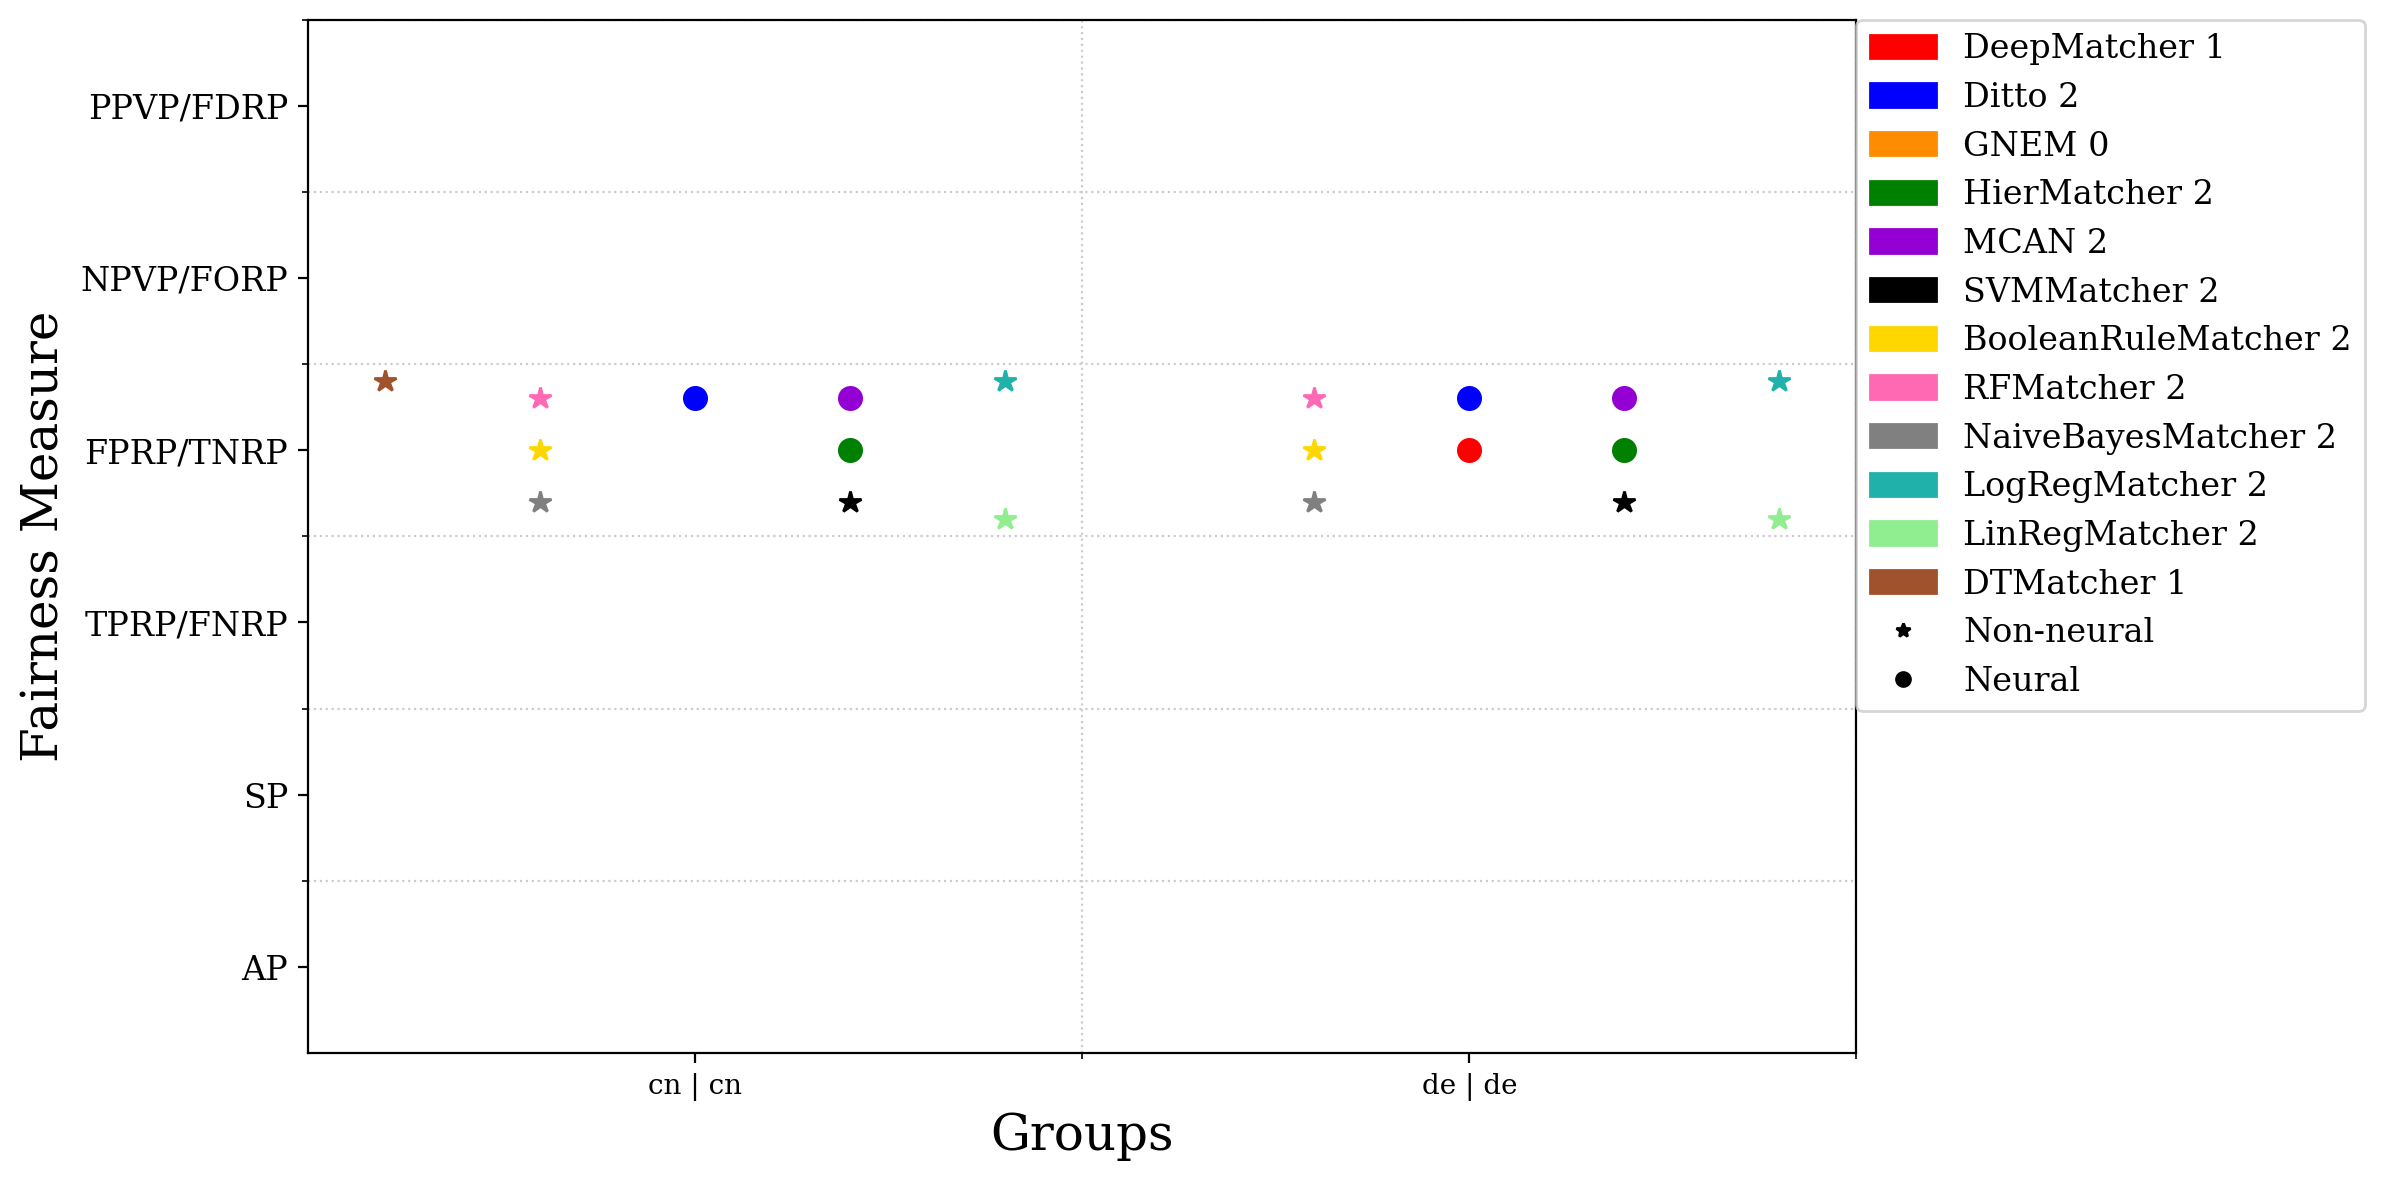

''

In [17]:
directory_path = './experiments/CSRankings/'
show_png_files(directory_path)

## Sensitivity to matching threshold experiments

In [1]:
import math
import os

import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tabulate import tabulate
import warnings
from sklearn.metrics import confusion_matrix

from IPython.core.display import Markdown

warnings.filterwarnings("ignore")

plt.rcParams["font.family"] = "serif"

thresholds = [
    0.2,
    0.25,
    0.3,
    0.35,
    0.4,
    0.45,
    0.5,
    0.55,
    0.6,
    0.65,
    0.7,
    0.75,
    0.8,
    0.85,
    0.9,
]
models = [
    "DeepMatcher",
    "Ditto",
    "GNEM",
    "HierMatcher",
    "MCAN",
    "svm",
    "rf",
    "nb",
    "lg",
    "ln",
    "dt",
]
datasets = [
    "Cameras",
    "DBLP-ACM",
    "DBLP-Scholar",
    "iTunes-Amazon",
]

arrs = []

for dataset in datasets:
    for model in models:
        for threshold in thresholds:
            df = pd.read_csv(model.lower() + "_results/" + dataset + "/scores.csv")
            predictions = [
                True if df.iloc[idx]["scores"] > threshold else False
                for idx in range(len(df))
            ]
            ground_truth = pd.read_csv("data/" + dataset + "/test.csv")["label"].values.tolist()
            
            arr = []
            arr.append(dataset)
            arr.append(model)
            arr.append(threshold)
            tn, fp, fn, tp = confusion_matrix(ground_truth, predictions).ravel()
            if tp + 0.5 * (fp + fn) == 0:
                f1 = 1
            else:
                f1 = tp / (tp + 0.5 * (fp + fn))
            if (tp + fp) == 0:
                ppv = 1
            else:
                ppv = tp / (tp + fp)

            if (tp + fn) == 0:
                tpr = 1
            else:
                tpr = tp / (tp + fn)
            arr.append(f1)
            arr.append(tpr)
            arr.append(ppv)
            arrs.append(arr)

df1 = (
    pd.DataFrame(arrs, columns=["dataset", "model", "threshold", "f1", "tpr", "ppv"])
    .sort_values(by=["dataset", "model", "threshold"])
    .reset_index()
)

df1["threshold"] = df1["threshold"].astype(float)
df1["f1"] = df1["f1"].astype(float)
df1["tpr"] = df1["tpr"].astype(float)
df1["ppv"] = df1["ppv"].astype(float)

In [ ]:
import csv

def process_scores(filename, threshold, output_file):
    with open(filename, 'r', newline='') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header if present
        rows = list(reader)
    
    preds = []
    for row in rows:
        score = float(row[0])
        if score > threshold:
            preds.append(1)
        else:
            preds.append(0)
    
    with open(output_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['preds'])
        writer.writerows([[pred] for pred in preds])

# Example usage:
for d in datasets:
    for m in models:
        for t in thresholds:
            filename = f'{str(m).lower()}_results/{d}/scores.csv'
            os.makedirs(f'threshold_experiments/{str(m).lower()}/{d}/{t}/', exist_ok=True)
            output_file = f'threshold_experiments/{str(m).lower()}/{d}/{t}/preds.csv'
            process_scores(filename, t, output_file)


In [ ]:
%%bash

thresholds=(
    0.2
    0.25
    0.3
    0.35
    0.4
    0.45
    0.5
    0.55
    0.6
    0.65
    0.7
    0.75
    0.8
    0.85
    0.9
)
sens_attrs=(
    "company"
    "venue"
    "ENTRYTYPE"
    "Genre"
)
datasets=(
    "Cameras"
    "DBLP-ACM"
    "DBLP-Scholar"
    "iTunes-Amazon"
)

for dataset_index in "${!datasets[@]}"; do
    for threshold in "${thresholds[@]}"; do
            python threshold_experiment.py "${datasets[$dataset_index]}" "${sens_attrs[$dataset_index]}" 0.2 12 6 "$threshold" &
    done
done

while wait -n; do : ; done;


In [2]:

def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)
    cbar = ax.figure.colorbar(
        im, ax=ax, **cbar_kw, shrink=0.75, ticks=np.linspace(0, 8, 9)
    )
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.3f}", **textkw):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

Sensitivity Table for TPRP:
| -             |     DT* |   Deep* |   Ditto |    GNEM |   Hier* |   LinReg* |   LogReg* |   MCAN |   NB* |     RF* |    SVM* |
|---------------|---------|---------|---------|---------|---------|-----------|-----------|--------|-------|---------|---------|
| Cameras       | 3.87298 | 2.23607 | 1.73205 | 3.74166 | 2.44949 |         0 |   0       |      0 |     0 | 0       | 0       |
| DBLP-ACM      | 0       | 0       | 0       | 0       | 0       |         0 |   0       |      0 |     0 | 0       | 0       |
| DBLP-Scholar  | 1.41421 | 1.41421 | 0       | 2.44949 | 1.41421 |         0 |   0       |      0 |     0 | 0       | 1       |
| iTunes-Amazon | 3.31662 | 7.68115 | 2.23607 | 7.34847 | 3.74166 |         0 |   2.44949 |      0 |     0 | 2.23607 | 2.44949 |

* "Matcher" postfix removed from the name of the matcher for presentation purposes.
---------------------------------------------------------------------------------------
Sensitivity Table for PPV

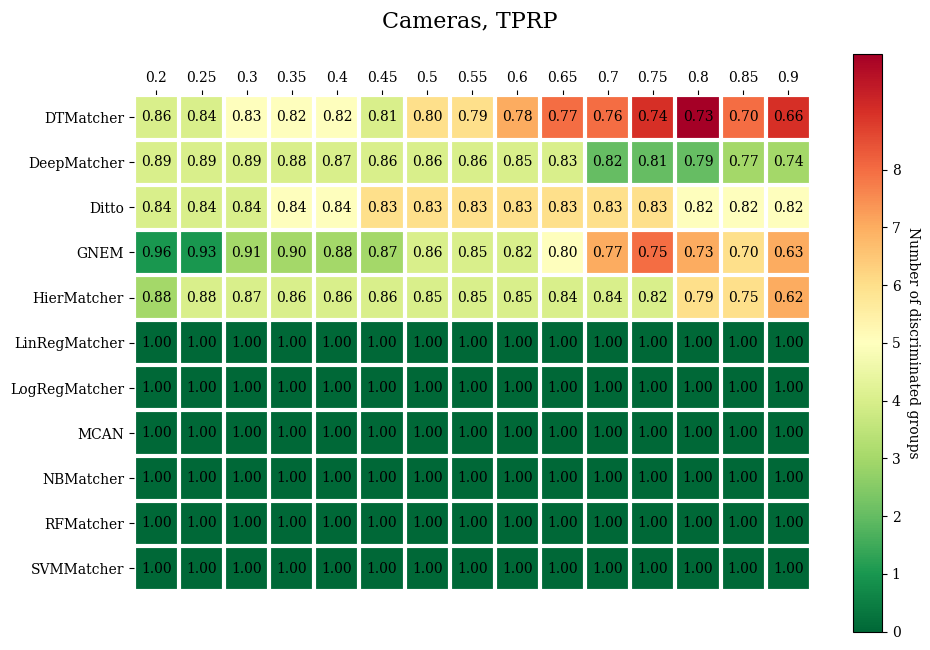

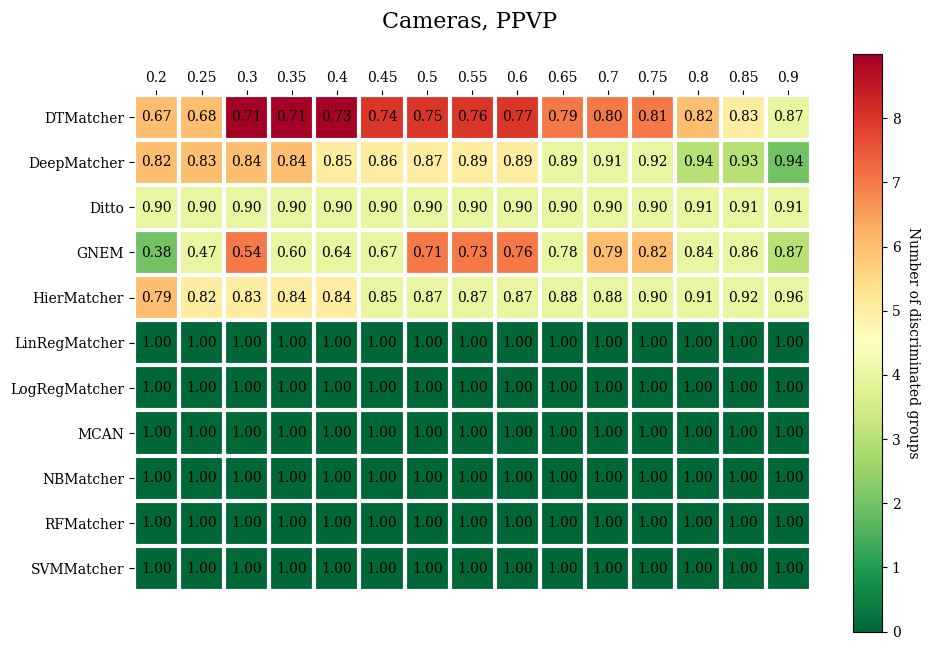

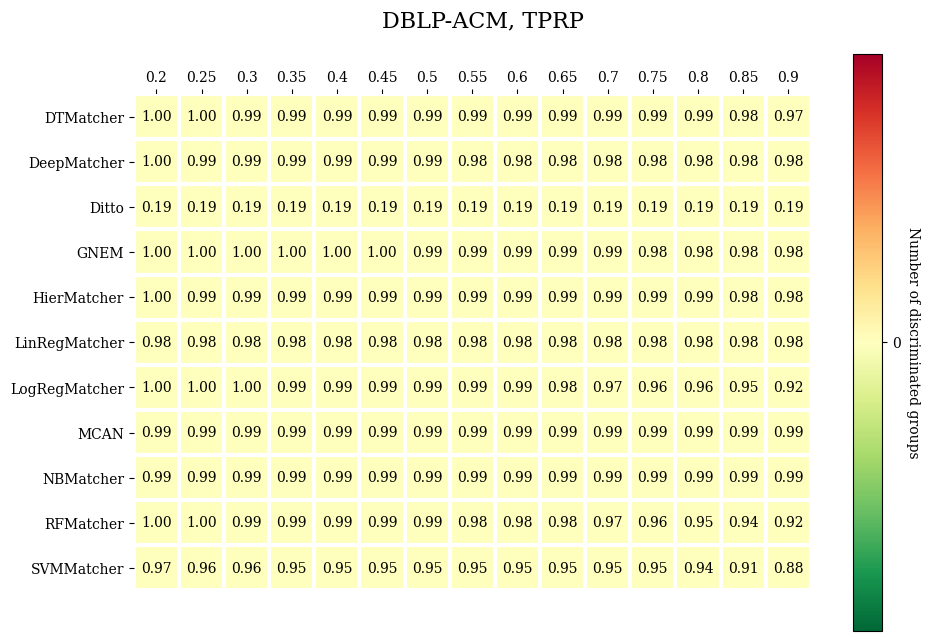

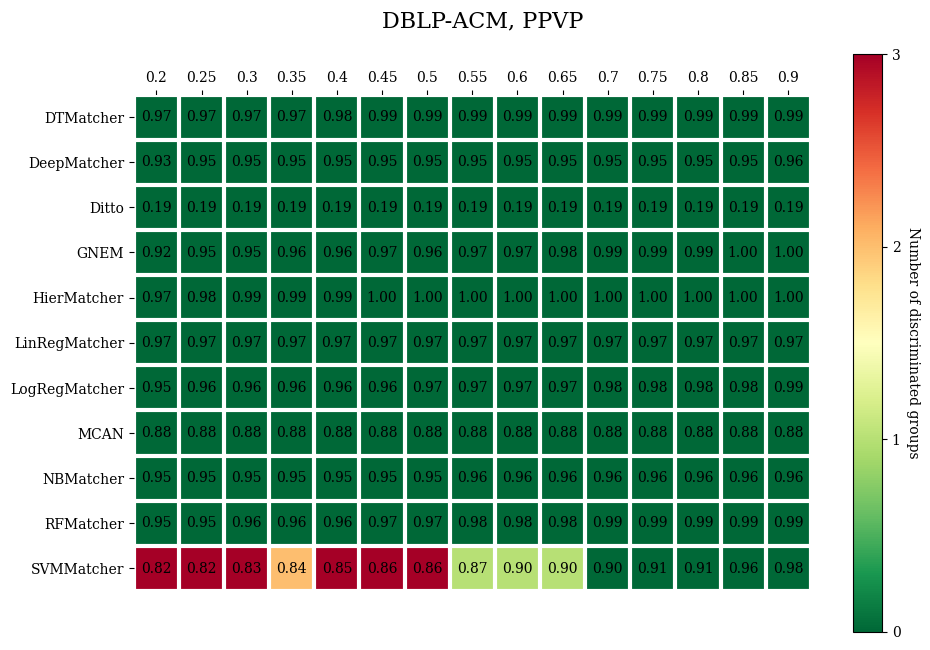

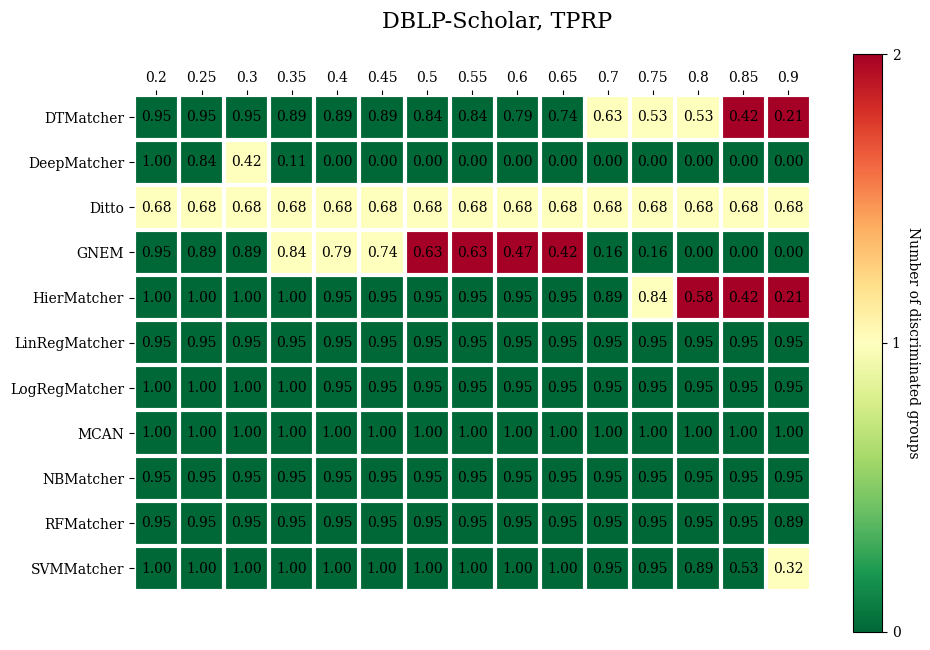

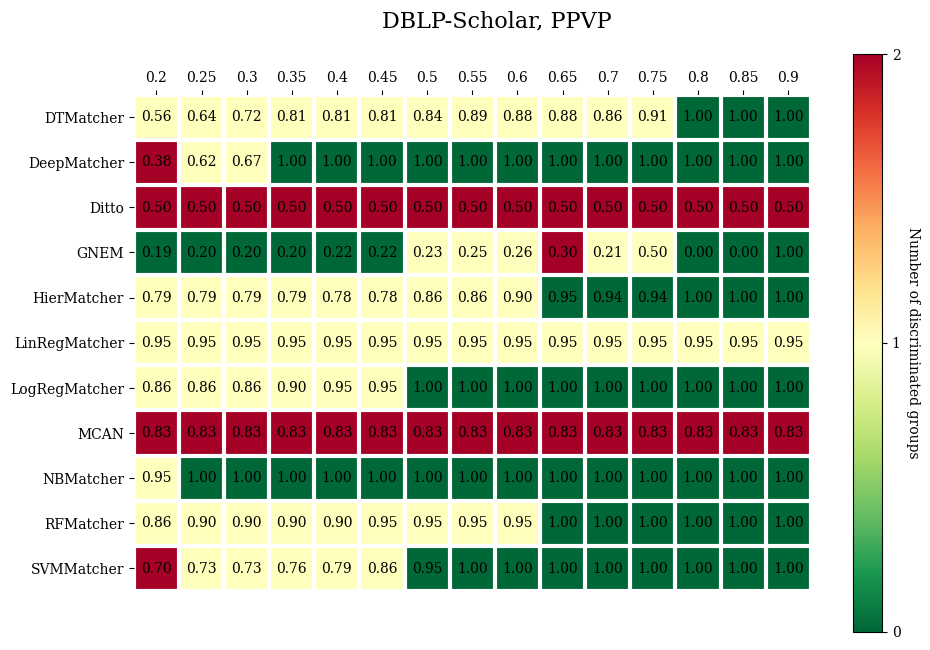

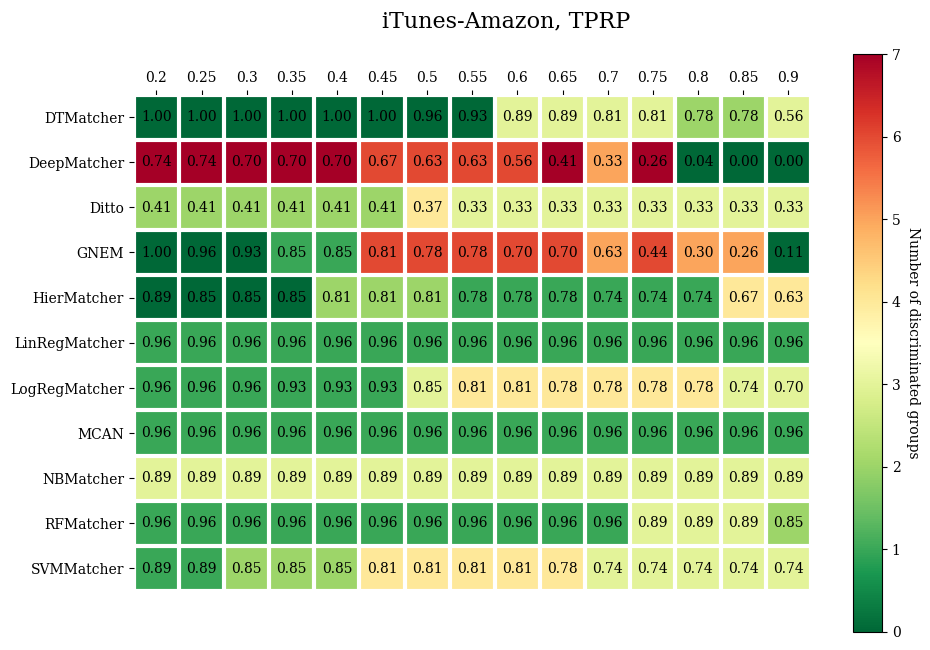

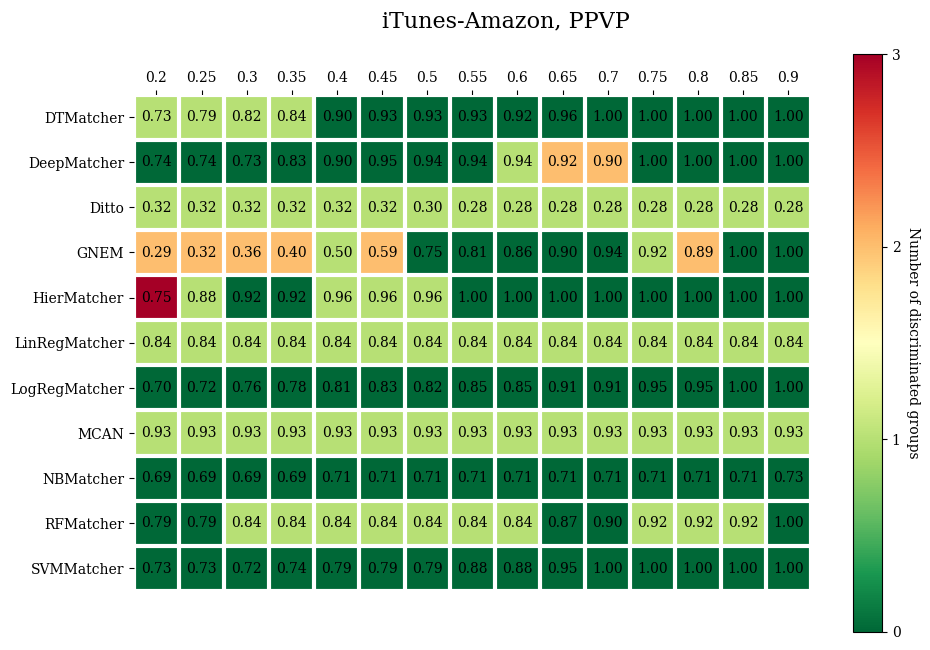

In [3]:
def g(df):
    return df[(df["measure"] == "true_positive_rate_parity") & (df["is_fair"] == False) & (df["counts"] >= 10)].shape[0]


l2_tprp = []
l2_ppvp = []
for dataset in datasets:
    df2 = df1[df1["dataset"] == dataset]
    df2 = df2.drop(columns=['dataset'])
    path = "./experiments/" + dataset + "/"

    tprp_arr = []
    ppvp_arr = []
    for t in thresholds:
        for file in os.listdir(path + str(t)):
            if not file.endswith(".csv"):
                continue 
            model = file.split("_")[0]
            df3 = pd.read_csv(path + str(t) + "/" + file)
            tprp = g(df3.copy())
            ppvp = df3.loc[
                (df3["measure"] == "positive_predictive_value_parity")
                & (df3["is_fair"] == False)
                & (df3["counts"] >= 10)
            ].shape[0]
            tprp_arr.append([model, t, tprp])
            ppvp_arr.append([model, t, ppvp])
    df = (
        pd.DataFrame(tprp_arr, columns=["model", "threshold", "count"])
        .sort_values(by=["model", "threshold"])
        .reset_index()
    )

    df = df.merge(df2, on=["model", "threshold"])
    x_axis = np.unique(df.threshold.values)
    y_axis = np.unique(df.model.values)
    colors = df['count'].values
    tpr = df.tpr.values
    colors = np.reshape(colors, (len(y_axis), len(x_axis)))

    squared_sum = []
    for row in colors:
        sum = 0
        for i in range(len(row) - 1):
            sum += (row[i] - row[i + 1]) ** 2
        squared_sum.append(math.sqrt(sum))
    squared_sum.insert(0, dataset)
    l2_tprp.append(squared_sum)

    tpr = np.reshape(tpr, (len(y_axis), len(x_axis)))
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 8))
    im, cbar = heatmap(
        colors,
        y_axis,
        x_axis,
        ax=ax,
        cmap="RdYlGn_r",
        cbarlabel="Number of discriminated groups",
    )
    y_tick_labels = [
        "DTMatcher",
        "DeepMatcher",
        "Ditto",
        "GNEM",
        "HierMatcher",
        "LinRegMatcher",
        "LogRegMatcher",
        "MCAN",
        "NBMatcher",
        "RFMatcher",
        "SVMMatcher",
    ]
    ax.set_yticklabels(y_tick_labels)
    text = annotate_heatmap(im, data=tpr, valfmt="{x:.2f}")
    plt.tight_layout()
    plt.text(5, -2, dataset+", TPRP", fontsize=16)  # Customize position and style
    plt.savefig("threshold_experiments/tprp_" + dataset + ".png")

    df = (
        pd.DataFrame(ppvp_arr, columns=["model", "threshold", "count"])
        .sort_values(by=["model", "threshold"])
        .reset_index()
    )
    df = df.merge(df2, on=["model", "threshold"])
    y_axis = np.unique(df.model.values)
    x_axis = np.unique(df.threshold.values)
    colors = df['count'].values
    ppv = df.ppv.values
    colors = np.reshape(colors, (len(y_axis), len(x_axis)))

    squared_sum = []
    for row in colors:
        sum = 0
        for i in range(len(row) - 1):
            sum += (row[i] - row[i + 1]) ** 2
        squared_sum.append(math.sqrt(sum))
    squared_sum.insert(0, dataset)
    l2_ppvp.append(squared_sum)

    ppv = np.reshape(ppv, (len(y_axis), len(x_axis)))
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 8))
    im, cbar = heatmap(
        colors,
        y_axis,
        x_axis,
        ax=ax,
        cmap="RdYlGn_r",
        cbarlabel="Number of discriminated groups",
    )
    y_tick_labels = [
        "DTMatcher",
        "DeepMatcher",
        "Ditto",
        "GNEM",
        "HierMatcher",
        "LinRegMatcher",
        "LogRegMatcher",
        "MCAN",
        "NBMatcher",
        "RFMatcher",
        "SVMMatcher",
    ]
    ax.set_yticklabels(y_tick_labels)
    text = annotate_heatmap(im, data=ppv, valfmt="{x:.2f}")
    plt.tight_layout()
    plt.text(5, -2, dataset+", PPVP", fontsize=16)  # Customize position and style
    plt.savefig("threshold_experiments/ppvp_" + dataset + ".png")

print("Sensitivity Table for TPRP:")
print(
    tabulate(
        l2_tprp,
        headers=[
            "-",
            "DT*",
            "Deep*",
            "Ditto",
            "GNEM",
            "Hier*",
            "LinReg*",
            "LogReg*",
            "MCAN",
            "NB*",
            "RF*",
            "SVM*",
        ],
        tablefmt="github",
    )
)
print()
print("* \"Matcher\" postfix removed from the name of the matcher for presentation purposes.")

print("---------------------------------------------------------------------------------------")
print("Sensitivity Table for PPVP:")
print(
    tabulate(
        l2_ppvp,
        headers=[
            "-",
            "DT*",
            "Deep*",
            "Ditto",
            "GNEM",
            "Hier*",
            "LinReg*",
            "LogReg*",
            "MCAN",
            "NB*",
            "RF*",
            "SVM*",
        ],
        tablefmt="github",
    )
)
print()
print("* \"Matcher\" postfix removed from the name of the matcher for presentation purposes.")
